## Loading Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn.objects as so
import plotly.express as px
import joblib

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector

from dash import Dash,html,dcc,Input,Output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.set_printoptions(edgeitems=30, suppress=True)

# 1. Data Processing & Cleaning

In [2]:
# Note : In this particular dataset,all the binary categorical variables are represented by 1 or 2.
# 1 - Yes or 2 - No
# Multicategorical variables are defined individually 

## a. Demographics Data

In [3]:
#### Pulling Demographics Data ####

demo_data = pd.read_sas("./NHNES_2017_2020_Data/P_DEMO.XPT")
demo_data

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0      109263.0      66.0       2.0       1.0       2.0       NaN       5.0   
1      109264.0      66.0       2.0       2.0      13.0       NaN       1.0   
2      109265.0      66.0       2.0       1.0       2.0       NaN       3.0   
3      109266.0      66.0       2.0       2.0      29.0       NaN       5.0   
4      109267.0      66.0       1.0       2.0      21.0       NaN       2.0   
...         ...       ...       ...       ...       ...       ...       ...   
15555  124818.0      66.0       2.0       1.0      40.0       NaN       4.0   
15556  124819.0      66.0       2.0       1.0       2.0       NaN       4.0   
15557  124820.0      66.0       2.0       2.0       7.0       NaN       3.0   
15558  124821.0      66.0       2.0       1.0      63.0       NaN       4.0   
15559  124822.0      66.0       2.0       1.0      74.0       NaN       2.0   

       RIDRETH3  RIDEXMON  DMDBORN4  ...  FIAINTRP  MIALANG  MIAPROXY  \
0           6.0       2.0       1.0  ...       2.0      NaN       NaN   
1           1.0       2.0       1.0  ...       2.0      1.0       2.0   
2           3.0       2.0       1.0  ...       2.0      NaN       NaN   
3           6.0       2.0       2.0  ...       2.0      1.0       2.0   
4           2.0       NaN       2.0  ...       2.0      NaN       NaN   
...         ...       ...       ...  ...       ...      ...       ...   
15555       4.0       1.0       1.0  ...       2.0      1.0       2.0   
15556       4.0       2.0       1.0  ...       2.0      NaN       NaN   
15557       3.0       2.0       1.0  ...       2.0      NaN       NaN   
15558       4.0       1.0       1.0  ...       2.0      1.0       2.0   
15559       2.0       2.0       2.0  ...       NaN      2.0       2.0   

       MIAINTRP  AIALANGA      WTINTPRP      WTMECPRP  SDMVPSU  SDMVSTRA  \
0           NaN       NaN   7891.762435  8.951816e+03      3.0     156.0   
1           2.0       1.0  11689.747264  1.227116e+04      1.0     155.0   
2           NaN       NaN  16273.825939  1.665876e+04      1.0     157.0   
3           2.0       1.0   7825.646112  8.154968e+03      2.0     168.0   
4           NaN       NaN  26379.991724  5.397605e-79      1.0     156.0   
...         ...       ...           ...           ...      ...       ...   
15555       2.0       1.0  21586.596728  2.166689e+04      1.0     166.0   
15556       NaN       NaN   1664.919253  1.838170e+03      2.0     171.0   
15557       NaN       NaN  14819.783161  1.649781e+04      1.0     157.0   
15558       2.0       1.0   4666.817952  4.853430e+03      1.0     158.0   
15559       2.0       NaN  14024.476634  1.519580e+04      1.0     149.0   

       INDFMPIR  
0          4.66  
1          0.83  
2          3.06  
3          5.00  
4          5.00  
...         ...  
15555      3.82  
15556      0.07  
15557      1.22  
15558      3.71  
15559       NaN  

[15560 rows x 29 columns]

In [4]:
demo_data[demo_data['SEQN']==109272]

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR      RIDAGEYR  RIDAGEMN  RIDRETH1  \
9  109272.0      66.0       2.0       1.0  5.397605e-79       3.0       1.0   

   RIDRETH3  RIDEXMON  DMDBORN4  ...  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  \
9       1.0       2.0       1.0  ...       2.0      NaN       NaN       NaN   

   AIALANGA     WTINTPRP     WTMECPRP  SDMVPSU  SDMVSTRA  INDFMPIR  
9       NaN  7037.380216  7872.776233      1.0     155.0      0.73  

[1 rows x 29 columns]

In [5]:
demo_data.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ', 'DMDEDUC2',
       'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')

In [6]:
demo_data.dtypes

SEQN        float64
SDDSRVYR    float64
RIDSTATR    float64
RIAGENDR    float64
RIDAGEYR    float64
RIDAGEMN    float64
RIDRETH1    float64
RIDRETH3    float64
RIDEXMON    float64
DMDBORN4    float64
DMDYRUSZ    float64
DMDEDUC2    float64
DMDMARTZ    float64
RIDEXPRG    float64
SIALANG     float64
SIAPROXY    float64
SIAINTRP    float64
FIALANG     float64
FIAPROXY    float64
FIAINTRP    float64
MIALANG     float64
MIAPROXY    float64
MIAINTRP    float64
AIALANGA    float64
WTINTPRP    float64
WTMECPRP    float64
SDMVPSU     float64
SDMVSTRA    float64
INDFMPIR    float64
dtype: object

In [7]:
demo_data.isna().sum()

SEQN            0
SDDSRVYR        0
RIDSTATR        0
RIAGENDR        0
RIDAGEYR        0
RIDAGEMN    14573
RIDRETH1        0
RIDRETH3        0
RIDEXMON     1260
DMDBORN4        0
DMDYRUSZ    12532
DMDEDUC2     6328
DMDMARTZ     6328
RIDEXPRG    13686
SIALANG         0
SIAPROXY        0
SIAINTRP        0
FIALANG      1079
FIAPROXY     1079
FIAINTRP     1079
MIALANG      4560
MIAPROXY     4560
MIAINTRP     4560
AIALANGA     7336
WTINTPRP        0
WTMECPRP        0
SDMVPSU         0
SDMVSTRA        0
INDFMPIR     2201
dtype: int64

In [8]:
#filtering out the relevant columns required from the demographics data based on its rigid availability and importance
demo_data_filtered = demo_data[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDBORN4','INDFMPIR']]

In [9]:
label1={1:'M',2:'F'}
demo_data_filtered['RIAGENDR']=demo_data_filtered['RIAGENDR'].map(label1)

label2={1:'MexA',2:'OHP',3:'NHW',4:'NHB',6:'NHA',7:'others'}
demo_data_filtered['RIDRETH3']=demo_data_filtered['RIDRETH3'].map(label2)

label3={1:'US',2:'Non_US'}
demo_data_filtered['DMDBORN4']=demo_data_filtered['DMDBORN4'].map(label3)

# label4={1:'Married',2:'Divorced',3:'Unmarried','.':'Not_known'}
# demo_data_filtered['DMDMARTZ']=demo_data_filtered['DMDMARTZ'].map(label4)

C:\Users\navan\AppData\Local\Temp\ipykernel_39076\2417665231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_filtered['RIAGENDR']=demo_data_filtered['RIAGENDR'].map(label1)
C:\Users\navan\AppData\Local\Temp\ipykernel_39076\2417665231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_filtered['RIDRETH3']=demo_data_filtered['RIDRETH3'].map(label2)
C:\Users\navan\AppData\Local\Temp\ipykernel_39076\2417665231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [11]:
# Renaming the filtered column names to have better readability

#RIAGENDR - Gender
#RIDAGEYR - Age
#RIDRETH3 - Race
#DMDBORN4 - Country
#DMDMARTZ - Marital_status
#INDFMPIR - ratio_famincome_to_pov

demo_data_filtered = demo_data_filtered.rename(columns = {'RIAGENDR':'Gender','RIDAGEYR':'Age','RIDRETH3':'Race','DMDBORN4':'Country',
                                                   'DMDMARTZ':'Marital_Status','INDFMPIR':'Ratio_Famincome_to_Pov'})
demo_data_filtered

SEQN Gender   Age  Race Country  Ratio_Famincome_to_Pov
0      109263.0      M   2.0   NHA      US                    4.66
1      109264.0      F  13.0  MexA      US                    0.83
2      109265.0      M   2.0   NHW      US                    3.06
3      109266.0      F  29.0   NHA  Non_US                    5.00
4      109267.0      F  21.0   OHP  Non_US                    5.00
...         ...    ...   ...   ...     ...                     ...
15555  124818.0      M  40.0   NHB      US                    3.82
15556  124819.0      M   2.0   NHB      US                    0.07
15557  124820.0      F   7.0   NHW      US                    1.22
15558  124821.0      M  63.0   NHB      US                    3.71
15559  124822.0      M  74.0   OHP  Non_US                     NaN

[15560 rows x 6 columns]

In [12]:
demo_data_filtered.describe()

SEQN           Age  Ratio_Famincome_to_Pov
count   15560.00000  1.556000e+04            1.335900e+04
mean   117042.50000  3.374248e+01            2.405937e+00
std      4491.92943  2.532053e+01            1.634346e+00
min    109263.00000  5.397605e-79            5.397605e-79
25%    113152.75000  1.000000e+01            1.020000e+00
50%    117042.50000  3.000000e+01            1.960000e+00
75%    120932.25000  5.600000e+01            3.880000e+00
max    124822.00000  8.000000e+01            5.000000e+00

In [13]:
demo_data_filtered.isna().sum()

SEQN                         0
Gender                       0
Age                          0
Race                         0
Country                      7
Ratio_Famincome_to_Pov    2201
dtype: int64

## b. Dietary Data

In [14]:


#### Pulling Dietary Data ####

folder_path = "./NHNES_2017_2020_Data/Dietary Data"

# List all files in the directory
files_path = [file for file in os.listdir(folder_path) if file.endswith('.XPT')]

for i in files_path:
    j = i.replace(".XPT", "")
    globals()[j] = pd.read_sas(folder_path+"/"+i)
    #globals()[j].to_csv(f"{j}.csv")


In [15]:
# The dietary data consists of food and supplements information taken by the individual split on basis of two days
# Food supplements consists of two day records which can be averaged out to one
# Supplements data can be carved out into one single categorical variable
P_DR1IFF.head()

SEQN     WTDRD1PP      WTDR2DPP  DR1ILINE  DR1DRSTZ  DR1EXMER  DRABF  \
0  109263.0  7619.483586  17808.067666      12.0       1.0      14.0    2.0   
1  109263.0  7619.483586  17808.067666      10.0       1.0      14.0    2.0   
2  109263.0  7619.483586  17808.067666       4.0       1.0      14.0    2.0   
3  109263.0  7619.483586  17808.067666       9.0       1.0      14.0    2.0   
4  109263.0  7619.483586  17808.067666      13.0       1.0      14.0    2.0   

   DRDINT  DR1DBIH  DR1DAY  ...  DR1IM181      DR1IM201      DR1IM221  \
0     2.0      4.0     6.0  ...     1.941  3.600000e-02  5.397605e-79   
1     2.0      4.0     6.0  ...     1.229  1.300000e-02  5.397605e-79   
2     2.0      4.0     6.0  ...     5.683  8.800000e-02  5.000000e-03   
3     2.0      4.0     6.0  ...     0.010  5.397605e-79  5.397605e-79   
4     2.0      4.0     6.0  ...     2.382  1.400000e-02  5.397605e-79   

   DR1IP182  DR1IP183      DR1IP184      DR1IP204      DR1IP205      DR1IP225  \
0     0.838     0.088  5.397605e-79  1.200000e-02  5.397605e-79  5.397605e-79   
1     0.520     0.013  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2     3.482     0.421  5.000000e-03  2.900000e-02  1.000000e-02  1.000000e-02   
3     0.069     0.015  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
4     1.209     0.114  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   

       DR1IP226  
0  5.397605e-79  
1  5.397605e-79  
2  5.397605e-79  
3  5.397605e-79  
4  5.397605e-79  

[5 rows x 84 columns]

In [16]:
P_DR2IFF.head()

SEQN     WTDRD1PP      WTDR2DPP  DR2ILINE  DR2DRSTZ  DR2EXMER  DRABF  \
0  109263.0  7619.483586  17808.067666       7.0       1.0      91.0    2.0   
1  109263.0  7619.483586  17808.067666      12.0       1.0      91.0    2.0   
2  109263.0  7619.483586  17808.067666       9.0       1.0      91.0    2.0   
3  109263.0  7619.483586  17808.067666       2.0       1.0      91.0    2.0   
4  109263.0  7619.483586  17808.067666      10.0       1.0      91.0    2.0   

   DRDINT  DR2DBIH  DR2DAY  ...      DR2IM181      DR2IM201      DR2IM221  \
0     2.0     13.0     1.0  ...  5.397605e-79  5.397605e-79  5.397605e-79   
1     2.0     13.0     1.0  ...  5.397605e-79  5.397605e-79  5.397605e-79   
2     2.0     13.0     1.0  ...  1.190000e-01  5.397605e-79  5.397605e-79   
3     2.0     13.0     1.0  ...  6.060000e-01  9.000000e-03  5.397605e-79   
4     2.0     13.0     1.0  ...  1.758000e+00  8.000000e-03  5.397605e-79   

       DR2IP182      DR2IP183      DR2IP184      DR2IP204      DR2IP205  \
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  8.600000e-02  1.800000e-02  5.397605e-79  5.397605e-79  5.397605e-79   
3  1.455000e+00  7.500000e-02  5.397605e-79  2.000000e-03  5.397605e-79   
4  1.670000e-01  1.400000e-02  5.397605e-79  1.700000e-02  1.000000e-03   

       DR2IP225      DR2IP226  
0  5.397605e-79  5.397605e-79  
1  5.397605e-79  5.397605e-79  
2  5.397605e-79  5.397605e-79  
3  5.397605e-79  5.397605e-79  
4  4.000000e-03  5.397605e-79  

[5 rows x 84 columns]

In [17]:
P_DSQTOT.head()

SEQN      DSDCOUNT      DSDANCNT  DSD010  DSD010AN  DSQTKCAL  DSQTPROT  \
0  109263.0  2.000000e+00  5.397605e-79     1.0       2.0      18.0       NaN   
1  109264.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
2  109265.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
3  109266.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
4  109267.0  1.000000e+00  5.397605e-79     1.0       2.0       NaN       NaN   

   DSQTCARB  DSQTSUGR  DSQTFIBE  ...  DSQTPHOS  DSQTMAGN  DSQTIRON  DSQTZINC  \
0       3.5       3.0       NaN  ...       NaN       NaN       NaN       1.4   
1       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   

   DSQTCOPP  DSQTSODI  DSQTPOTA  DSQTSELE  DSQTCAFF  DSQTIODI  
0       NaN       2.5       NaN       NaN       NaN      21.0  
1       NaN       NaN       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN       NaN       NaN  
4       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 39 columns]

### Food and Nutrients Data

In [18]:
P_DR1IFF['day_no']=1
P_DR2IFF['day_no']=2

In [19]:
P_DR1IFF.columns

Index(['SEQN', 'WTDRD1PP', 'WTDR2DPP', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER',
       'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM',
       'DR1CCMTX', 'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD',
       'DR1IGRMS', 'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE',
       'DR1ITFAT', 'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1ICHOL', 'DR1IATOC',
       'DR1IATOA', 'DR1IRET', 'DR1IVARA', 'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP',
       'DR1ILYCO', 'DR1ILZ', 'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6',
       'DR1IFOLA', 'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12',
       'DR1IB12A', 'DR1IVC', 'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS',
       'DR1IMAGN', 'DR1IIRON', 'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA',
       'DR1ISELE', 'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040',
       'DR1IS060', 'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160',
       'DR1IS180', 'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182',
       

In [20]:
P_DR2IFF.columns

Index(['SEQN', 'WTDRD1PP', 'WTDR2DPP', 'DR2ILINE', 'DR2DRSTZ', 'DR2EXMER',
       'DRABF', 'DRDINT', 'DR2DBIH', 'DR2DAY', 'DR2LANG', 'DR2CCMNM',
       'DR2CCMTX', 'DR2_020', 'DR2_030Z', 'DR2FS', 'DR2_040Z', 'DR2IFDCD',
       'DR2IGRMS', 'DR2IKCAL', 'DR2IPROT', 'DR2ICARB', 'DR2ISUGR', 'DR2IFIBE',
       'DR2ITFAT', 'DR2ISFAT', 'DR2IMFAT', 'DR2IPFAT', 'DR2ICHOL', 'DR2IATOC',
       'DR2IATOA', 'DR2IRET', 'DR2IVARA', 'DR2IACAR', 'DR2IBCAR', 'DR2ICRYP',
       'DR2ILYCO', 'DR2ILZ', 'DR2IVB1', 'DR2IVB2', 'DR2INIAC', 'DR2IVB6',
       'DR2IFOLA', 'DR2IFA', 'DR2IFF', 'DR2IFDFE', 'DR2ICHL', 'DR2IVB12',
       'DR2IB12A', 'DR2IVC', 'DR2IVD', 'DR2IVK', 'DR2ICALC', 'DR2IPHOS',
       'DR2IMAGN', 'DR2IIRON', 'DR2IZINC', 'DR2ICOPP', 'DR2ISODI', 'DR2IPOTA',
       'DR2ISELE', 'DR2ICAFF', 'DR2ITHEO', 'DR2IALCO', 'DR2IMOIS', 'DR2IS040',
       'DR2IS060', 'DR2IS080', 'DR2IS100', 'DR2IS120', 'DR2IS140', 'DR2IS160',
       'DR2IS180', 'DR2IM161', 'DR2IM181', 'DR2IM201', 'DR2IM221', 'DR2IP182',
       

In [21]:
common_column_names=['SEQN',
'WTDRD1PP','WTDR2DPP','DRILINE','DRDRSTZ','DREXMER','DRABF','DRDINT','DRDBIH','DRDAY','DRLANG','DRCCMNM','DRCCMTX','DR_020','DR_030Z','DRFS','DR_040Z','DRIFDCD','DRIGRMS','DRIKCAL','DRIPROT','DRICARB','DRISUGR','DRIFIBE','DRITFAT','DRISFAT','DRIMFAT',
'DRIPFAT','DRICHOL','DRIATOC','DRIATOA','DRIRET','DRIVARA','DRIACAR','DRIBCAR','DRICRYP','DRILYCO','DRILZ','DRIVB1','DRIVB2','DRINIAC','DRIVB6','DRIFOLA','DRIFA','DRIFF','DRIFDFE','DRICHL','DRIVB12','DRIB12A','DRIVC','DRIVD','DRIVK','DRICALC','DRIPHOS','DRIMAGN','DRIIRON','DRIZINC','DRICOPP','DRISODI',
'DRIPOTA','DRISELE','DRICAFF','DRITHEO','DRIALCO','DRIMOIS','DRIS040','DRIS060','DRIS080','DRIS100','DRIS120','DRIS140','DRIS160','DRIS180','DRIM161','DRIM181','DRIM201','DRIM221','DRIP182','DRIP183','DRIP184','DRIP204','DRIP205','DRIP225','DRIP226','day_no']

In [22]:
# Concatenating the both day1 and day2 food supplements
P_DR1IFF.columns=common_column_names
P_DR2IFF.columns=common_column_names
P_DRIFF = pd.concat([P_DR1IFF, P_DR2IFF], ignore_index=True)
P_DRIFF

SEQN      WTDRD1PP      WTDR2DPP  DRILINE  DRDRSTZ  DREXMER  \
0       109263.0   7619.483586  17808.067666     12.0      1.0     14.0   
1       109263.0   7619.483586  17808.067666     10.0      1.0     14.0   
2       109263.0   7619.483586  17808.067666      4.0      1.0     14.0   
3       109263.0   7619.483586  17808.067666      9.0      1.0     14.0   
4       109263.0   7619.483586  17808.067666     13.0      1.0     14.0   
...          ...           ...           ...      ...      ...      ...   
333400  124820.0  34357.827846  35051.859179      5.0      1.0     78.0   
333401  124820.0  34357.827846  35051.859179      4.0      1.0     78.0   
333402  124820.0  34357.827846  35051.859179      3.0      1.0     78.0   
333403  124820.0  34357.827846  35051.859179      2.0      1.0     78.0   
333404  124820.0  34357.827846  35051.859179      1.0      1.0     78.0   

        DRABF  DRDINT  DRDBIH  DRDAY  ...       DRIM201       DRIM221  \
0         2.0     2.0     4.0    6.0  ...  3.600000e-02  5.397605e-79   
1         2.0     2.0     4.0    6.0  ...  1.300000e-02  5.397605e-79   
2         2.0     2.0     4.0    6.0  ...  8.800000e-02  5.000000e-03   
3         2.0     2.0     4.0    6.0  ...  5.397605e-79  5.397605e-79   
4         2.0     2.0     4.0    6.0  ...  1.400000e-02  5.397605e-79   
...       ...     ...     ...    ...  ...           ...           ...   
333400    2.0     2.0    29.0    1.0  ...  4.000000e-02  5.397605e-79   
333401    2.0     2.0    29.0    1.0  ...  7.000000e-02  3.800000e-02   
333402    2.0     2.0    29.0    1.0  ...  9.100000e-02  4.000000e-03   
333403    2.0     2.0    29.0    1.0  ...  5.397605e-79  5.397605e-79   
333404    2.0     2.0    29.0    1.0  ...  6.000000e-03  5.397605e-79   

        DRIP182  DRIP183       DRIP184       DRIP204       DRIP205  \
0         0.838    0.088  5.397605e-79  1.200000e-02  5.397605e-79   
1         0.520    0.013  5.397605e-79  5.397605e-79  5.397605e-79   
2         3.482    0.421  5.000000e-03  2.900000e-02  1.000000e-02   
3         0.069    0.015  5.397605e-79  5.397605e-79  5.397605e-79   
4         1.209    0.114  5.397605e-79  5.397605e-79  5.397605e-79   
...         ...      ...           ...           ...           ...   
333400    0.595    0.035  5.397605e-79  4.300000e-02  5.397605e-79   
333401    0.555    0.051  2.000000e-03  1.800000e-02  2.000000e-03   
333402    2.964    0.134  5.397605e-79  3.000000e-03  5.397605e-79   
333403    0.053    0.011  5.397605e-79  5.397605e-79  5.397605e-79   
333404    0.303    0.009  5.397605e-79  5.397605e-79  5.397605e-79   

             DRIP225       DRIP226  day_no  
0       5.397605e-79  5.397605e-79       1  
1       5.397605e-79  5.397605e-79       1  
2       1.000000e-02  5.397605e-79       1  
3       5.397605e-79  5.397605e-79       1  
4       5.397605e-79  5.397605e-79       1  
...              ...           ...     ...  
333400  5.397605e-79  5.000000e-03       2  
333401  8.000000e-03  5.397605e-79       2  
333402  5.397605e-79  5.397605e-79       2  
333403  5.397605e-79  5.397605e-79       2  
333404  5.397605e-79  5.397605e-79       2  

[333405 rows x 85 columns]

In [23]:
formatted_time=[]

for i in range(len(P_DRIFF['DR_020'])):

    # Calculate hours and minutes
    hours, remainder = divmod(P_DRIFF['DR_020'][i], 3600)
    minutes = remainder // 60

    # Format the result as HH:MM
    formatted_time.append( "{:02d}:{:02d}".format(int(hours), int(minutes)))
    
P_DRIFF['DR_020'] = formatted_time

In [24]:
P_DRIFF= P_DRIFF.sort_values(by = ['SEQN','day_no','DR_020','DRILINE'])
P_DRIFF.reset_index(inplace = True, drop = True)
P_DRIFF

SEQN     WTDRD1PP      WTDR2DPP  DRILINE  DRDRSTZ  DREXMER  DRABF  \
0       109263.0  7619.483586  1.780807e+04      1.0      1.0     14.0    2.0   
1       109263.0  7619.483586  1.780807e+04      2.0      1.0     14.0    2.0   
2       109263.0  7619.483586  1.780807e+04      3.0      1.0     14.0    2.0   
3       109263.0  7619.483586  1.780807e+04      4.0      1.0     14.0    2.0   
4       109263.0  7619.483586  1.780807e+04      5.0      1.0     14.0    2.0   
...          ...          ...           ...      ...      ...      ...    ...   
333400  124821.0  3043.724330  5.397605e-79      6.0      1.0     81.0    2.0   
333401  124821.0  3043.724330  5.397605e-79      7.0      1.0     81.0    2.0   
333402  124821.0  3043.724330  5.397605e-79      8.0      1.0     81.0    2.0   
333403  124821.0  3043.724330  5.397605e-79      9.0      1.0     81.0    2.0   
333404  124821.0  3043.724330  5.397605e-79     10.0      1.0     81.0    2.0   

        DRDINT        DRDBIH  DRDAY  ...       DRIM201       DRIM221  \
0          2.0  4.000000e+00    6.0  ...  5.397605e-79  5.397605e-79   
1          2.0  4.000000e+00    6.0  ...  1.400000e-02  5.397605e-79   
2          2.0  4.000000e+00    6.0  ...  5.397605e-79  5.397605e-79   
3          2.0  4.000000e+00    6.0  ...  8.800000e-02  5.000000e-03   
4          2.0  4.000000e+00    6.0  ...  5.397605e-79  5.397605e-79   
...        ...           ...    ...  ...           ...           ...   
333400     1.0  5.397605e-79    7.0  ...  5.100000e-02  5.397605e-79   
333401     1.0  5.397605e-79    7.0  ...  5.397605e-79  5.397605e-79   
333402     1.0  5.397605e-79    7.0  ...  9.000000e-03  5.397605e-79   
333403     1.0  5.397605e-79    7.0  ...  5.397605e-79  5.397605e-79   
333404     1.0  5.397605e-79    7.0  ...  5.397605e-79  5.397605e-79   

             DRIP182       DRIP183       DRIP184       DRIP204       DRIP205  \
0       2.300000e-02  5.000000e-03  5.397605e-79  5.397605e-79  5.397605e-79   
1       1.269000e+00  1.200000e-01  5.397605e-79  5.397605e-79  5.397605e-79   
2       5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3       3.482000e+00  4.210000e-01  5.000000e-03  2.900000e-02  1.000000e-02   
4       5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
...              ...           ...           ...           ...           ...   
333400  2.319000e+00  2.560000e-01  5.397605e-79  3.800000e-02  1.300000e-02   
333401  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
333402  9.650000e-01  1.270000e-01  5.397605e-79  1.300000e-02  5.397605e-79   
333403  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
333404  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   

             DRIP225       DRIP226  day_no  
0       5.397605e-79  5.397605e-79       1  
1       5.397605e-79  5.397605e-79       1  
2       5.397605e-79  5.397605e-79       1  
3       1.000000e-02  5.397605e-79       1  
4       5.397605e-79  5.397605e-79       1  
...              ...           ...     ...  
333400  5.397605e-79  1.300000e-02       1  
333401  5.397605e-79  5.397605e-79       1  
333402  6.000000e-03  5.397605e-79       1  
333403  5.397605e-79  5.397605e-79       1  
333404  5.397605e-79  5.397605e-79       1  

[333405 rows x 85 columns]

In [25]:
# Selecting relevant columns which are identifiable by common people and could be a good fit in our model
P_DRIFF_filtered=P_DRIFF[['SEQN','day_no','DRIKCAL', 'DRIPROT', 'DRICARB', 'DRISUGR',
       'DRIFIBE', 'DRITFAT','DRIATOC','DRIVARA', 'DRIVB1', 'DRIVB2','DRIVB6', 
       'DRIVB12', 'DRIB12A', 'DRIVC', 'DRIVD', 'DRIVK', 'DRICALC',
       'DRIPHOS', 'DRIMAGN', 'DRIIRON', 'DRIZINC', 'DRICOPP', 'DRISODI',
       'DRIPOTA', 'DRISELE', 'DRICAFF']]

In [26]:
P_DRIFF_AGG=P_DRIFF_filtered.groupby(['SEQN','day_no']).sum().reset_index()

In [27]:
P_DRIFF_AGG_2=P_DRIFF_AGG.drop(columns=['day_no'])

In [28]:
P_DRIFF_AGG_3=P_DRIFF_AGG_2.groupby(['SEQN']).mean().reset_index()

In [29]:
P_DRIFF_AGG_3 = P_DRIFF_AGG_3.rename(columns = {'DRIKCAL':'avgday_Energy_in_kcal','DRIPROT':'avgday_Protein_in_gm','DRICARB':'avgday_Carb_in_gm','DRISUGR':'avgday_sug_in_gm',
                                                   'DRIFIBE':'avgday_diet_fib_in_gm','DRITFAT':'avgday_fat_in_gm','DRIATOC':'avgday_Vitamin_E_in_mcg',
                                                    'DRIVARA':'avgday_Vitamin_A_in_mcg','DRIVB1':'avgday_Vitamin_B1_in_mg','DRIVB2':'avgday_Vitamin_B2_in_mg',
                                                    'DRIVB6':'Vitamin_B6_mg','DRIVB12':'Vitamin_B12_mg','DRIB12A':'added_Vitamin_B6_mg','DRIVC':'Vitamin_C_mg',
                                                'DRIVD':'avgday_Vitamin_D_in_mg', 'DRIVK':'avgday_Vitamin_K_in_mg', 'DRICALC':'avgday_calcium_in_mg',
       'DRIPHOS':'avgday_phosporus_in_mg', 'DRIMAGN':'avgday_magnesium_in_mg', 'DRIIRON':'avgday_iron_in_mg', 'DRIZINC':'avgday_zinc_in_mg', 'DRICOPP':'avgday_copper_in_mg', 'DRISODI':'avgday_sodium_in_mg',
       'DRIPOTA':'avgday_potassium_in_mg', 'DRISELE':'avgday_selenium_in_mg', 'DRICAFF':'avgday_caffeine_in_mg'
                                                                            })


### Supplements

In [30]:
P_DSQTOT.columns

Index(['SEQN', 'DSDCOUNT', 'DSDANCNT', 'DSD010', 'DSD010AN', 'DSQTKCAL',
       'DSQTPROT', 'DSQTCARB', 'DSQTSUGR', 'DSQTFIBE', 'DSQTTFAT', 'DSQTSFAT',
       'DSQTMFAT', 'DSQTPFAT', 'DSQTCHOL', 'DSQTLYCO', 'DSQTLZ', 'DSQTVB1',
       'DSQTVB2', 'DSQTNIAC', 'DSQTVB6', 'DSQTFA', 'DSQTFDFE', 'DSQTCHL',
       'DSQTVB12', 'DSQTVC', 'DSQTVK', 'DSQTVD', 'DSQTCALC', 'DSQTPHOS',
       'DSQTMAGN', 'DSQTIRON', 'DSQTZINC', 'DSQTCOPP', 'DSQTSODI', 'DSQTPOTA',
       'DSQTSELE', 'DSQTCAFF', 'DSQTIODI'],
      dtype='object')

In [31]:
P_DSQTOT_filtered = P_DSQTOT[['SEQN','DSD010']]

label_s={1:'Yes',2:'No',7:'No',9:'No'}
P_DSQTOT_filtered['DSD010']=P_DSQTOT_filtered['DSD010'].map(label_s)

C:\Users\navan\AppData\Local\Temp\ipykernel_39076\3216623712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_DSQTOT_filtered['DSD010']=P_DSQTOT_filtered['DSD010'].map(label_s)


In [32]:
P_DSQTOT_filtered.columns =['SEQN','supplements_taken']

In [33]:
#P_DSQTOT_filtered['Supplements_taken'] = np.where((P_DSQTOT_filtered['DSDCOUNT'] > 0) & (P_DSQTOT_filtered['DSDCOUNT'] <= 20), 1,
 #                           np.where((P_DSQTOT_filtered['DSDCOUNT'] == 77) | (P_DSQTOT_filtered['DSDCOUNT'] == 99), None, 2))
#P_DSQTOT_filtered1 = P_DSQTOT_filtered[['SEQN','Supplements_taken']]
#P_DSQTOT_filtered1['Supplements_taken'].unique()

## c. Examination Data

In [34]:
#### Pulling Examination Data ####


folder_path = "./NHNES_2017_2020_Data/Examination Data"

# List all files in the directory
files_path = [file for file in os.listdir(folder_path) if file.endswith('.XPT')]

exam_data = pd.DataFrame({'SEQN': demo_data['SEQN']})

for i in files_path:
    j = i.replace(".XPT", "")
    globals()[j] = pd.read_sas(folder_path+"/"+i)
    globals()[j][j] = j
    exam_data = exam_data.merge(globals()[j], on="SEQN", how="left")
    print(i)
    print("individual file length:")
    print(len(globals()[j]['SEQN']))
    print("combined file length:")
    print(len(exam_data['SEQN']))

exam_data


P_BMX.XPT
individual file length:
14300
combined file length:
15560
P_BPXO.XPT
individual file length:
11656
combined file length:
15560


SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0      109263.0       4.0    NaN    NaN       NaN       NaN      NaN      NaN   
1      109264.0       1.0   42.2    NaN       NaN       NaN      NaN      NaN   
2      109265.0       1.0   12.0    NaN      91.6       NaN      NaN      NaN   
3      109266.0       1.0   97.1    NaN       NaN       NaN      NaN      NaN   
4      109267.0       NaN    NaN    NaN       NaN       NaN      NaN      NaN   
...         ...       ...    ...    ...       ...       ...      ...      ...   
15555  124818.0       1.0  108.8    NaN       NaN       NaN      NaN      NaN   
15556  124819.0       1.0   15.4    NaN      94.9       NaN      NaN      NaN   
15557  124820.0       1.0   22.9    NaN       NaN       NaN      NaN      NaN   
15558  124821.0       1.0   79.5    NaN       NaN       NaN      NaN      NaN   
15559  124822.0       1.0   59.7    NaN       NaN       NaN      NaN      NaN   

       BMXHT  BMIHT  ...  BPXOSY1  BPXODI1  BPXOSY2  BPXODI2  BPXOSY3  \
0        NaN    NaN  ...      NaN      NaN      NaN      NaN      NaN   
1      154.7    NaN  ...    109.0     67.0    109.0     68.0    106.0   
2       89.3    NaN  ...      NaN      NaN      NaN      NaN      NaN   
3      160.2    NaN  ...     99.0     56.0     99.0     55.0     99.0   
4        NaN    NaN  ...      NaN      NaN      NaN      NaN      NaN   
...      ...    ...  ...      ...      ...      ...      ...      ...   
15555  168.7    3.0  ...    106.0     67.0    108.0     65.0     95.0   
15556   93.7    NaN  ...      NaN      NaN      NaN      NaN      NaN   
15557  123.3    NaN  ...      NaN      NaN      NaN      NaN      NaN   
15558  176.4    NaN  ...    121.0     66.0    122.0     67.0    129.0   
15559  167.5    NaN  ...    122.0     55.0    121.0     56.0    123.0   

       BPXODI3  BPXOPLS1  BPXOPLS2  BPXOPLS3  P_BPXO  
0          NaN       NaN       NaN       NaN     NaN  
1         66.0      94.0      95.0      91.0  P_BPXO  
2          NaN       NaN       NaN       NaN     NaN  
3         52.0      68.0      66.0      66.0  P_BPXO  
4          NaN       NaN       NaN       NaN     NaN  
...        ...       ...       ...       ...     ...  
15555     70.0     120.0     119.0     118.0  P_BPXO  
15556      NaN       NaN       NaN       NaN     NaN  
15557      NaN       NaN       NaN       NaN     NaN  
15558     67.0      60.0      61.0      61.0  P_BPXO  
15559     58.0      56.0      53.0      56.0  P_BPXO  

[15560 rows x 35 columns]

In [35]:
exam_data.isna().sum()

SEQN            0
BMDSTATS     1260
BMXWT        1485
BMIWT       14972
BMXRECUM    14090
BMIRECUM    15517
BMXHEAD     15250
BMIHEAD     15560
BMXHT        2403
BMIHT       15389
BMXBMI       2423
BMDBMIC     10811
BMXLEG       4576
BMILEG      15072
BMXARML      2070
BMIARML     15073
BMXARMC      2076
BMIARMC     15067
BMXWAIST     2986
BMIWAIST    14943
BMXHIP       5698
BMIHIP      15184
P_BMX        1260
BPAOARM      3904
BPAOCSZ      5187
BPXOSY1      5208
BPXODI1      5208
BPXOSY2      5233
BPXODI2      5233
BPXOSY3      5274
BPXODI3      5274
BPXOPLS1     6089
BPXOPLS2     6112
BPXOPLS3     6148
P_BPXO       3904
dtype: int64

In [36]:
exam_data['avg_pulse_rate']=exam_data[['BPXOPLS1','BPXOPLS2','BPXOPLS2']].mean(axis=1)

In [37]:
#filtered based on importance of the feature and the presence of non null responses
exam_data_filtered=exam_data[['SEQN','avg_pulse_rate','BMXBMI']]
exam_data_filtered.columns=['SEQN','avg_pulse_rate','body_mass_index']

## d. Laboratory Data

In [38]:
#### Pulling Laboratory Data ####


folder_path = "./NHNES_2017_2020_Data/Laboratory Data"

# List all files in the directory
files_path = [file for file in os.listdir(folder_path) if file.endswith('.XPT')]

lab_data = pd.DataFrame({'SEQN': demo_data['SEQN']})

for i in files_path:
    j = i.replace(".XPT", "")
    globals()[j] = pd.read_sas(folder_path+"/"+i)
    globals()[j][j] = j
    lab_data = lab_data.merge(globals()[j], on="SEQN", how="left")
    print(i)
    print("individual file length:")
    print(len(globals()[j]['SEQN']))
    print("combined file length:")
    print(len(lab_data['SEQN']))

lab_data


P_ALB_CR.XPT
individual file length:
13027
combined file length:
15560
P_BIOPRO.XPT
individual file length:
10409
combined file length:
15560
P_CBC.XPT
individual file length:
13772
combined file length:
15560
P_CMV.XPT
individual file length:
1574
combined file length:
15560
P_COT.XPT
individual file length:
13027
combined file length:
15560
P_CRCO.XPT
individual file length:
5949
combined file length:
15560
P_ETHOX.XPT
individual file length:
4061
combined file length:
15560
P_FASTQX.XPT
individual file length:
13772
combined file length:
15560
P_FERTIN.XPT
individual file length:
11983
combined file length:
15560
P_FETIB.XPT
individual file length:
10409
combined file length:
15560
P_FOLATE.XPT
individual file length:
8386
combined file length:
15560
P_FOLFMS.XPT
individual file length:
8386
combined file length:
15560
P_FR.XPT
individual file length:
4929
combined file length:
15560
P_GHB.XPT
individual file length:
10409
combined file length:
15560
P_GLU.XPT
individual file length

SEQN  URXUMA  URXUMS      URDUMALC  URXUCR   URXCRS      URDUCRLC  \
0      109263.0     NaN     NaN           NaN     NaN      NaN           NaN   
1      109264.0     NaN     NaN           NaN     NaN      NaN           NaN   
2      109265.0     NaN     NaN           NaN     NaN      NaN           NaN   
3      109266.0     5.5     5.5  5.397605e-79    36.0   3182.4  5.397605e-79   
4      109267.0     NaN     NaN           NaN     NaN      NaN           NaN   
...         ...     ...     ...           ...     ...      ...           ...   
15555  124818.0    12.8    12.8  5.397605e-79   370.0  32708.0  5.397605e-79   
15556  124819.0     NaN     NaN           NaN     NaN      NaN           NaN   
15557  124820.0    10.8    10.8  5.397605e-79    68.0   6011.2  5.397605e-79   
15558  124821.0     6.1     6.1  5.397605e-79   191.0  16884.4  5.397605e-79   
15559  124822.0     4.0     4.0  5.397605e-79   100.0   8840.0  5.397605e-79   

       URDACT  P_ALB_CR  LBXSATSI  ...      WTSAFPRP  LBXTR  LBDTRSI  LBDLDL  \
0         NaN       NaN       NaN  ...           NaN    NaN      NaN     NaN   
1         NaN  P_ALB_CR       8.0  ...  27533.174559   40.0    0.452    86.0   
2         NaN       NaN       NaN  ...           NaN    NaN      NaN     NaN   
3       15.28  P_ALB_CR      15.0  ...           NaN    NaN      NaN     NaN   
4         NaN       NaN       NaN  ...           NaN    NaN      NaN     NaN   
...       ...       ...       ...  ...           ...    ...      ...     ...   
15555    3.46  P_ALB_CR      19.0  ...           NaN    NaN      NaN     NaN   
15556     NaN       NaN       NaN  ...           NaN    NaN      NaN     NaN   
15557   15.88  P_ALB_CR       NaN  ...           NaN    NaN      NaN     NaN   
15558    3.19  P_ALB_CR      13.0  ...  10704.467871   51.0    0.576   101.0   
15559    4.00  P_ALB_CR      17.0  ...  36585.328133   75.0    0.847    91.0   

       LBDLDLSI  LBDLDLM  LBDLDMSI  LBDLDLN  LBDLDNSI  P_TRIGLY  
0           NaN      NaN       NaN      NaN       NaN       NaN  
1         2.224     82.0     2.121     85.0     2.198  P_TRIGLY  
2           NaN      NaN       NaN      NaN       NaN       NaN  
3           NaN      NaN       NaN      NaN       NaN       NaN  
4           NaN      NaN       NaN      NaN       NaN       NaN  
...         ...      ...       ...      ...       ...       ...  
15555       NaN      NaN       NaN      NaN       NaN       NaN  
15556       NaN      NaN       NaN      NaN       NaN       NaN  
15557       NaN      NaN       NaN      NaN       NaN       NaN  
15558     2.612     98.0     2.534    100.0     2.586  P_TRIGLY  
15559     2.353     90.0     2.327     92.0     2.379  P_TRIGLY  

[15560 rows x 235 columns]

In [39]:
lab_data.dtypes

SEQN        float64
URXUMA      float64
URXUMS      float64
URDUMALC    float64
URXUCR      float64
             ...   
LBDLDLM     float64
LBDLDMSI    float64
LBDLDLN     float64
LBDLDNSI    float64
P_TRIGLY     object
Length: 235, dtype: object

In [40]:
lab_data.isna().sum()

SEQN            0
URXUMA       3050
URXUMS       3050
URDUMALC     3050
URXUCR       3051
            ...  
LBDLDLM     10943
LBDLDMSI    10943
LBDLDLN     10918
LBDLDNSI    10918
P_TRIGLY    10470
Length: 235, dtype: int64

In [41]:
#filtered based on importance of the feature and the presence of responses
lab_data_filtered=lab_data[['SEQN','LBXTC','LBXWBCSI','LBXRBCSI','LBXHGB']]
lab_data_filtered.columns=['SEQN','tot_cholestrol_mgperdL','white_blood_cell_count','red_blood_cell_count','hemoglobin_gperdL']

## e.Questionnaire Data

In [42]:
#### Pulling Questionnire Data ####


folder_path = "./NHNES_2017_2020_Data/Questionnaire Data"

# List all files in the directory
files_path = [file for file in os.listdir(folder_path) if file.endswith('.XPT')]

ques_data = pd.DataFrame({'SEQN': demo_data['SEQN']})

for i in files_path:
    j = i.replace(".XPT", "")
    globals()[j] = pd.read_sas(folder_path+"/"+i)
    globals()[j][j] = j
    ques_data = ques_data.merge(globals()[j], on="SEQN", how="left")
    print(i)
    print("individual file length:")
    print(len(globals()[j]['SEQN']))
    print("combined file length:")
    print(len(ques_data['SEQN']))

ques_data


P_ACQ.XPT
individual file length:
14149
combined file length:
15560
P_ALQ.XPT
individual file length:
8965
combined file length:
15560
P_AUQ.XPT
individual file length:
14986
combined file length:
15560
P_BPQ.XPT
individual file length:
10195
combined file length:
15560
P_CBQPFA.XPT
individual file length:
8552
combined file length:
15560
P_CBQPFC.XPT
individual file length:
3567
combined file length:
15560
P_CDQ.XPT
individual file length:
6433
combined file length:
15560
P_DBQ.XPT
individual file length:
15560
combined file length:
15560
P_DEQ.XPT
individual file length:
5810
combined file length:
15560
P_DIQ.XPT
individual file length:
14986
combined file length:
15560
P_DPQ.XPT
individual file length:
8965
combined file length:
15560
P_ECQ.XPT
individual file length:
5365
combined file length:
15560
P_FSQ.XPT
individual file length:
15560
combined file length:
15560
P_HEQ.XPT
individual file length:
13218
combined file length:
15560
P_HIQ.XPT
individual file length:
15560
combined 

SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  P_ACQ  ALQ111  \
0      109263.0      NaN      NaN      NaN     NaN     NaN    NaN     NaN   
1      109264.0      NaN      NaN      NaN     5.0     NaN  P_ACQ     NaN   
2      109265.0      NaN      NaN      NaN     NaN     NaN    NaN     NaN   
3      109266.0      NaN      NaN      NaN     NaN     1.0  P_ACQ     1.0   
4      109267.0      NaN      NaN      NaN     4.0     NaN  P_ACQ     NaN   
...         ...      ...      ...      ...     ...     ...    ...     ...   
15555  124818.0      1.0      NaN      NaN     NaN     NaN  P_ACQ     1.0   
15556  124819.0      NaN      NaN      NaN     NaN     NaN    NaN     NaN   
15557  124820.0      1.0      NaN      NaN     NaN     NaN  P_ACQ     NaN   
15558  124821.0      1.0      NaN      NaN     NaN     NaN  P_ACQ     1.0   
15559  124822.0      NaN      NaN      NaN     3.0     NaN  P_ACQ     1.0   

       ALQ121  ALQ130  ...  WHD110  WHD120  WHD130  WHD140  WHQ150  P_WHQ  \
0         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN   
1         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN   
2         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN   
3        10.0     1.0  ...     NaN   210.0     NaN   218.0    28.0  P_WHQ   
4         NaN     NaN  ...     NaN     NaN     NaN   148.0    19.0  P_WHQ   
...       ...     ...  ...     ...     ...     ...     ...     ...    ...   
15555     9.0     2.0  ...   190.0   180.0     NaN   235.0    40.0  P_WHQ   
15556     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN   
15557     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN   
15558     5.0     5.0  ...   170.0   165.0    71.0   183.0    55.0  P_WHQ   
15559     6.0     2.0  ...   150.0   115.0    66.0   150.0    60.0  P_WHQ   

      WHQ030M  WHQ500  WHQ520  P_WHQMEC  
0         NaN     NaN     NaN       NaN  
1         2.0     4.0     1.0  P_WHQMEC  
2         NaN     NaN     NaN       NaN  
3         NaN     NaN     NaN       NaN  
4         NaN     NaN     NaN       NaN  
...       ...     ...     ...       ...  
15555     NaN     NaN     NaN       NaN  
15556     NaN     NaN     NaN       NaN  
15557     NaN     NaN     NaN       NaN  
15558     NaN     NaN     NaN       NaN  
15559     NaN     NaN     NaN       NaN  

[15560 rows x 897 columns]

In [43]:
ques_data.dtypes

SEQN        float64
ACD011A     float64
ACD011B     float64
ACD011C     float64
ACD040      float64
             ...   
P_WHQ        object
WHQ030M     float64
WHQ500      float64
WHQ520      float64
P_WHQMEC     object
Length: 897, dtype: object

In [44]:
ques_data.isna().sum()

SEQN            0
ACD011A      6322
ACD011B     15518
ACD011C     15301
ACD040      12392
            ...  
P_WHQ        5365
WHQ030M     13439
WHQ500      13440
WHQ520      13440
P_WHQMEC    13349
Length: 897, dtype: int64

In [45]:
#filtered based on importance of the feature and the presence of responses
ques_data_filtered=ques_data[['SEQN','ALQ130','SMD650','PAQ655','PAQ610','HUQ030']]

In [46]:
label_q={1:'Yes',2:'No',3:'No',7:'No',9:'No'}
ques_data_filtered['HUQ030']=ques_data_filtered['HUQ030'].map(label_q)

C:\Users\navan\AppData\Local\Temp\ipykernel_39076\3555439060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_data_filtered['HUQ030']=ques_data_filtered['HUQ030'].map(label_q)


In [47]:
ques_data_filtered.columns=['SEQN','avg_alc_drinks_per_day','avg_cig_per_day','exercise_days_per_week','vigorous_workdays_per_week','access_to_healthcare']
ques_data_filtered.fillna(0,inplace=True)

C:\Users\navan\AppData\Local\Temp\ipykernel_39076\2202485613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_data_filtered.fillna(0,inplace=True)


## g. Target Variables Data

In [48]:
target_var=ques_data[['SEQN','DIQ010','KIQ022','CDQ001','MCQ010','MCQ160A','MCQ160M','MCQ220']]

In [49]:
target_var.isna().sum()

SEQN          0
DIQ010      574
KIQ022     6328
CDQ001     9127
MCQ010      574
MCQ160A    6328
MCQ160M    6328
MCQ220     6328
dtype: int64

In [50]:
#filling the null values with the default No
target_var=target_var.fillna(2)

In [51]:
target_var.columns=['SEQN','diabetes','kidney_failure','heart_stroke','asthma','arthiritis','thyroid','cancer']

In [52]:
# total we got 7 variables which act as target variables
# we can classify 7 diseases in this project

In [53]:
label={1:'Yes',2:'No',3:'No',7:'No',9:'No'}
target_var['diabetes']=target_var['diabetes'].map(label)
target_var['kidney_failure']=target_var['kidney_failure'].map(label)
target_var['heart_stroke']=target_var['heart_stroke'].map(label)
target_var['asthma']=target_var['asthma'].map(label)
target_var['arthiritis']=target_var['arthiritis'].map(label)
target_var['thyroid']=target_var['thyroid'].map(label)
target_var['cancer']=target_var['cancer'].map(label)

In [54]:
def extract_combination(row):
    cols_with_1 = target_var.columns[row == 'Yes']
    return '_'.join(cols_with_1) if len(cols_with_1) > 0 else 'no_risk'

def extract_combination_2(row):
    cols_with_1 = target_var.columns[row == 'Yes']
    return 'afflicted' if len(cols_with_1) > 0 else 'not_afflicted'

# def extract_combination_3(row):
#     cols_with_1 = target_var.columns[row == 'Yes']
#     return 1 if len(cols_with_1) > 0 else 0


#Apply the function to each row to create a new column 'combination_of_ones'
target_var['comb_disease'] = target_var.apply(extract_combination, axis=1)
target_var['chronic_disease'] = target_var.apply(extract_combination_2, axis=1)
# target_var['chronic_disease_bin'] = target_var.apply(extract_combination_3, axis=1)

In [55]:
print(target_var['comb_disease'].value_counts())

comb_disease
no_risk                                                9243
asthma                                                 1439
arthiritis                                              772
heart_stroke                                            411
diabetes                                                352
                                                       ... 
diabetes_kidney_failure_heart_stroke_thyroid_cancer       1
kidney_failure_heart_stroke_thyroid_cancer                1
diabetes_heart_stroke_asthma_thyroid_cancer               1
diabetes_kidney_failure_heart_stroke_asthma_thyroid       1
diabetes_kidney_failure_thyroid_cancer                    1
Name: count, Length: 119, dtype: int64


In [56]:
target_var.to_csv('./Outputs/target_variables.csv')

## Combining the Data

In [57]:
P_DRIFF_AGG_3

SEQN  avgday_Energy_in_kcal  avgday_Protein_in_gm  \
0      109263.0                 1267.5                43.620   
1      109264.0                 1489.0                65.165   
2      109265.0                 1738.5                53.140   
3      109266.0                 1797.0                57.750   
4      109269.0                 1049.0                26.410   
...         ...                    ...                   ...   
12629  124817.0                 1131.0                51.330   
12630  124818.0                 3397.0                86.565   
12631  124819.0                 1446.0                46.565   
12632  124820.0                 1433.0                43.905   
12633  124821.0                 1698.0               138.100   

       avgday_Carb_in_gm  avgday_sug_in_gm  avgday_diet_fib_in_gm  \
0                190.150            78.170                   6.85   
1                186.630            58.470                  12.70   
2                220.700           141.090                   8.55   
3                246.655            79.955                  19.70   
4                129.770            81.750                   3.25   
...                  ...               ...                    ...   
12629             90.330            51.030                   5.80   
12630            432.870           249.520                  18.65   
12631            174.205            83.335                   9.10   
12632            183.775            79.185                  11.10   
12633            110.590            50.570                   6.70   

       avgday_fat_in_gm  avgday_Vitamin_E_in_mcg  avgday_Vitamin_A_in_mcg  \
0                36.135                    4.645                    304.5   
1                55.865                    5.100                   1122.5   
2                73.620                    4.440                    633.0   
3                67.410                   11.050                    420.0   
4                48.165                    4.075                    280.0   
...                 ...                      ...                      ...   
12629            63.180                    4.460                    530.0   
12630           152.515                   11.910                   1081.0   
12631            63.825                    3.530                    366.5   
12632            60.735                    5.270                    567.0   
12633            76.030                    9.830                    165.0   

       avgday_Vitamin_B1_in_mg  ...  avgday_calcium_in_mg  \
0                       1.6960  ...                1026.5   
1                       2.2000  ...                 571.5   
2                       1.1845  ...                1112.0   
3                       1.2930  ...                1048.0   
4                       0.5835  ...                 358.5   
...                        ...  ...                   ...   
12629                   0.4020  ...                 355.0   
12630                   1.8820  ...                 967.0   
12631                   1.0345  ...                1006.5   
12632                   1.3725  ...                1006.0   
12633                   1.2700  ...                 368.0   

       avgday_phosporus_in_mg  avgday_magnesium_in_mg  avgday_iron_in_mg  \
0                       758.5                   160.0             10.615   
1                      1055.5                   196.5             28.245   
2                      1192.0                   196.0              7.230   
3                      1246.5                   342.0             11.550   
4                       548.0                    75.5              5.860   
...                       ...                     ...                ...   
12629                   704.0                   142.0              7.860   
12630                  1290.0                   216.0             14.165   
12631                   981.0                   154.5              6.60

In [58]:
final_files_list=["target_var","demo_data_filtered","P_DRIFF_AGG_3","P_DSQTOT_filtered","exam_data_filtered",
                  "lab_data_filtered","ques_data_filtered"]

data_cube = pd.DataFrame({'SEQN': demo_data['SEQN']})

for i in final_files_list:
    k=globals()[i]
    data_cube = data_cube.merge(k, on="SEQN", how="left")
    print("file name: ",i,"\n Columns in the file: ",k.columns,"\n Individual file length:",len(k['SEQN']),
          "\n combined file length:",len(data_cube['SEQN']),"\n\n")
#     print("individual file length:")
#     print(len(i['SEQN']))
#     print("combined file length:")
#     print(len(data_cube['SEQN']))

file name:  target_var 
 Columns in the file:  Index(['SEQN', 'diabetes', 'kidney_failure', 'heart_stroke', 'asthma',
       'arthiritis', 'thyroid', 'cancer', 'comb_disease', 'chronic_disease'],
      dtype='object') 
 Individual file length: 15560 
 combined file length: 15560 


file name:  demo_data_filtered 
 Columns in the file:  Index(['SEQN', 'Gender', 'Age', 'Race', 'Country', 'Ratio_Famincome_to_Pov'], dtype='object') 
 Individual file length: 15560 
 combined file length: 15560 


file name:  P_DRIFF_AGG_3 
 Columns in the file:  Index(['SEQN', 'avgday_Energy_in_kcal', 'avgday_Protein_in_gm',
       'avgday_Carb_in_gm', 'avgday_sug_in_gm', 'avgday_diet_fib_in_gm',
       'avgday_fat_in_gm', 'avgday_Vitamin_E_in_mcg',
       'avgday_Vitamin_A_in_mcg', 'avgday_Vitamin_B1_in_mg',
       'avgday_Vitamin_B2_in_mg', 'Vitamin_B6_mg', 'Vitamin_B12_mg',
       'added_Vitamin_B6_mg', 'Vitamin_C_mg', 'avgday_Vitamin_D_in_mg',
       'avgday_Vitamin_K_in_mg', 'avgday_calcium_in_mg',
   

In [59]:
data_cube.to_csv('./Outputs/Combined_data_cube.csv')

#  Data Cleaning

In [60]:
data_cube_filtered=data_cube.query('Age!=5.39760534693402E-79 & Ratio_Famincome_to_Pov!=5.39760534693402E-79')

In [61]:
cleaned_data_cube=data_cube_filtered.dropna()
cleaned_data_cube.to_csv('./cleaned_data_cube.csv')
cleaned_data_cube

SEQN diabetes kidney_failure heart_stroke asthma arthiritis  \
1      109264.0       No             No           No     No         No   
3      109266.0       No             No           No     No         No   
7      109270.0       No             No           No     No         No   
10     109273.0       No             No           No     No         No   
14     109277.0       No             No           No     No         No   
...         ...      ...            ...          ...    ...        ...   
15551  124814.0       No             No           No     No         No   
15552  124815.0       No             No           No     No         No   
15554  124817.0      Yes             No          Yes     No        Yes   
15555  124818.0       No             No          Yes     No         No   
15558  124821.0       No             No           No    Yes        Yes   

      thyroid cancer                                     comb_disease  \
1          No     No                                          no_risk   
3          No     No                                          no_risk   
7          No     No                                          no_risk   
10         No     No                                          no_risk   
14         No     No                                          no_risk   
...       ...    ...                                              ...   
15551      No     No                                          no_risk   
15552      No     No                                          no_risk   
15554     Yes    Yes  diabetes_heart_stroke_arthiritis_thyroid_cancer   
15555      No     No                                     heart_stroke   
15558      No     No                                asthma_arthiritis   

      chronic_disease  ... body_mass_index  tot_cholestrol_mgperdL  \
1       not_afflicted  ...            17.6                   166.0   
3       not_afflicted  ...            37.8                   195.0   
7       not_afflicted  ...            30.9                   103.0   
10      not_afflicted  ...            21.9                   164.0   
14      not_afflicted  ...            18.6                   129.0   
...               ...  ...             ...                     ...   
15551   not_afflicted  ...            37.5                   225.0   
15552   not_afflicted  ...            29.5                   203.0   
15554       afflicted  ...            37.9                   200.0   
15555       afflicted  ...            38.2                   234.0   
15558       afflicted  ...            25.5                   155.0   

      white_blood_cell_count red_blood_cell_count  hemoglobin_gperdL  \
1                        4.5                 4.80               13.7   
3                        7.8                 4.35               12.3   
7                        7.6                 5.77               12.0   
10                       6.2                 5.16               15.9   
14                       7.9                 4.41               12.9   
...                      ...                  ...                ...   
15551                    8.2                 4.24               10.4   
15552                    5.4                 5.26               15.0   
15554                   10.9                 4.73               14.3   
15555                    6.1                 4.83               13.5   
15558                    4.9                 5.36               15.6   

       avg_alc_drinks_per_day  avg_cig_per_day  exercise_days_per_week  \
1                         0.0              0.0                     0.0   
3                         1.0              0.0                     5.0   
7                         0.0              0.0                     0.0   
10                        0.0             15.0                     0.0   
14                        0.0              0.0                     0.0   
...                       ...              ...                     ...   
15551                

In [62]:
first_row_with_headers = cleaned_data_cube.head(1).rename(index={0: 'First Row'})
first_row_with_headers

SEQN diabetes kidney_failure heart_stroke asthma arthiritis thyroid  \
1  109264.0       No             No           No     No         No      No   

  cancer comb_disease chronic_disease  ... body_mass_index  \
1     No      no_risk   not_afflicted  ...            17.6   

   tot_cholestrol_mgperdL white_blood_cell_count red_blood_cell_count  \
1                   166.0                    4.5                  4.8   

   hemoglobin_gperdL  avg_alc_drinks_per_day  avg_cig_per_day  \
1               13.7                     0.0              0.0   

   exercise_days_per_week  vigorous_workdays_per_week  access_to_healthcare  
1                     0.0                         0.0                   Yes  

[1 rows x 53 columns]

In [63]:
a=cleaned_data_cube.head(1).T
print(a)
a.stack()

                                        1
SEQN                             109264.0
diabetes                               No
kidney_failure                         No
heart_stroke                           No
asthma                                 No
arthiritis                             No
thyroid                                No
cancer                                 No
comb_disease                      no_risk
chronic_disease             not_afflicted
Gender                                  F
Age                                  13.0
Race                                 MexA
Country                                US
Ratio_Famincome_to_Pov               0.83
avgday_Energy_in_kcal              1489.0
avgday_Protein_in_gm               65.165
avgday_Carb_in_gm                  186.63
avgday_sug_in_gm                    58.47
avgday_diet_fib_in_gm                12.7
avgday_fat_in_gm                   55.865
avgday_Vitamin_E_in_mcg               5.1
avgday_Vitamin_A_in_mcg           

SEQN                        1         109264.0
diabetes                    1               No
kidney_failure              1               No
heart_stroke                1               No
asthma                      1               No
arthiritis                  1               No
thyroid                     1               No
cancer                      1               No
comb_disease                1          no_risk
chronic_disease             1    not_afflicted
Gender                      1                F
Age                         1             13.0
Race                        1             MexA
Country                     1               US
Ratio_Famincome_to_Pov      1             0.83
avgday_Energy_in_kcal       1           1489.0
avgday_Protein_in_gm        1           65.165
avgday_Carb_in_gm           1           186.63
avgday_sug_in_gm            1            58.47
avgday_diet_fib_in_gm       1             12.7
avgday_fat_in_gm            1           55.865
avgday_Vitami

In [64]:
cleaned_data_cube.stack()

1      SEQN                          109264.0
       diabetes                            No
       kidney_failure                      No
       heart_stroke                        No
       asthma                              No
                                       ...   
15558  avg_alc_drinks_per_day             5.0
       avg_cig_per_day                    0.0
       exercise_days_per_week             0.0
       vigorous_workdays_per_week         1.0
       access_to_healthcare               Yes
Length: 375664, dtype: object

In [65]:
cleaned_data_cube.shape

#After Cleaning the data, we got 7086 records from 15560 and 55 variables among which 44 can be used as features, 

(7088, 53)

In [66]:
cleaned_data_cube.to_csv('./Outputs/cleaned_cube_data.csv')

In [67]:
cleaned_data_cube[['comb_disease']].value_counts()

comb_disease                                                         
no_risk                                                                  3561
asthma                                                                    682
arthiritis                                                                425
heart_stroke                                                              247
diabetes                                                                  201
                                                                         ... 
diabetes_kidney_failure_heart_stroke_asthma_arthiritis_thyroid_cancer       1
diabetes_kidney_failure_asthma_arthiritis_cancer                            1
kidney_failure_asthma_cancer                                                1
kidney_failure_asthma_arthiritis_thyroid_cancer                             1
diabetes_kidney_failure_heart_stroke_asthma_cancer                          1
Name: count, Length: 108, dtype: int64

In [68]:
# Removing kidney_failure and combination of diseases from the list as they got very less records and could further dilute the model
dlist=['diabetes','heart_stroke','asthma','arthiritis','thyroid','cancer','no_risk']

In [69]:
condensed_cube=cleaned_data_cube[cleaned_data_cube['comb_disease'].isin(dlist)]

# The data is condensed to select 5314 records

# 2.  Data Visualization

In [70]:
condensed_cube.describe()

SEQN          Age  Ratio_Famincome_to_Pov  \
count    5417.000000  5417.000000            5.417000e+03   
mean   117084.818903    35.167067            2.547115e+00   
std      4510.098637    20.136388            1.651065e+00   
min    109264.000000     8.000000            5.397605e-79   
25%    113171.000000    17.000000            1.110000e+00   
50%    117146.000000    32.000000            2.150000e+00   
75%    121012.000000    51.000000            4.170000e+00   
max    124818.000000    80.000000            5.000000e+00   

       avgday_Energy_in_kcal  avgday_Protein_in_gm  avgday_Carb_in_gm  \
count            5417.000000           5417.000000        5417.000000   
mean             2060.958926             77.132239         243.891566   
std               852.071485             35.651656         107.234466   
min               283.500000              3.240000           5.320000   
25%              1471.000000             53.605000         170.750000   
50%              1931.500000             71.100000         229.345000   
75%              2500.000000             93.590000         299.600000   
max              8967.500000            370.830000        1183.345000   

       avgday_sug_in_gm  avgday_diet_fib_in_gm  avgday_fat_in_gm  \
count       5417.000000           5.417000e+03       5417.000000   
mean         103.894317           1.574163e+01         83.471835   
std           62.070701           9.001629e+00         40.748923   
min            0.190000           1.079521e-78          0.750000   
25%           60.860000           9.650000e+00         56.035000   
50%           92.585000           1.390000e+01         77.010000   
75%          132.725000           1.975000e+01        104.040000   
max          655.730000           1.034000e+02        508.280000   

       avgday_Vitamin_E_in_mcg  ...  avg_pulse_rate  body_mass_index  \
count             5.417000e+03  ...     5417.000000      5417.000000   
mean              8.628255e+00  ...       71.827149        27.436312   
std               5.477842e+00  ...       12.126402         7.417574   
min               1.079521e-78  ...       34.000000        13.200000   
25%               5.110000e+00  ...       63.333333        22.200000   
50%               7.405000e+00  ...       71.000000        26.500000   
75%               1.059000e+01  ...       79.666667        31.500000   
max               7.873000e+01  ...      141.333333        68.200000   

       tot_cholestrol_mgperdL  white_blood_cell_count  red_blood_cell_count  \
count             5417.000000             5417.000000           5417.000000   
mean               176.715341                7.108935              4.778815   
std                 39.947369                2.179061              0.459450   
min                 73.000000                1.900000              2.320000   
25%                148.000000                5.600000              4.460000   
50%                172.000000                6.800000              4.760000   
75%                200.000000                8.300000              5.070000   
max                428.000000               41.900000              7.840000   

       hemoglobin_gperdL  avg_alc_drinks_per_day  avg_cig_per_day  \
count        5417.000000             5417.000000      5417.000000   
mean           13.975245                2.873731         1.450434   
std             1.491150               37.411900        14.219989   
min             5.400000                0.000000         0.000000   
25%            13.000000                0.000000         0.000000   
50%            14.000000                1.000000         0.000000   
75%            15.000000                2.000000         0.000000   
max            19.900000              999.000000       999.000000   

       exercise_days_per_week  vigorous_workdays_per_week  
count             5417.000000                 5417.000000  
mean                 0.776075                    0.872808  
std                  1.625100   

In [358]:
condensed_cube.shape

(5393, 54)

In [71]:
condensed_cube.isna().sum()

SEQN                          0
diabetes                      0
kidney_failure                0
heart_stroke                  0
asthma                        0
arthiritis                    0
thyroid                       0
cancer                        0
comb_disease                  0
chronic_disease               0
Gender                        0
Age                           0
Race                          0
Country                       0
Ratio_Famincome_to_Pov        0
avgday_Energy_in_kcal         0
avgday_Protein_in_gm          0
avgday_Carb_in_gm             0
avgday_sug_in_gm              0
avgday_diet_fib_in_gm         0
avgday_fat_in_gm              0
avgday_Vitamin_E_in_mcg       0
avgday_Vitamin_A_in_mcg       0
avgday_Vitamin_B1_in_mg       0
avgday_Vitamin_B2_in_mg       0
Vitamin_B6_mg                 0
Vitamin_B12_mg                0
added_Vitamin_B6_mg           0
Vitamin_C_mg                  0
avgday_Vitamin_D_in_mg        0
avgday_Vitamin_K_in_mg        0
avgday_c

In [72]:
condensed_cube[['comb_disease']].value_counts()

comb_disease  
no_risk           3561
asthma             682
arthiritis         425
heart_stroke       247
diabetes           201
thyroid            160
cancer             117
kidney_failure      24
Name: count, dtype: int64

In [74]:
condensed_cube[['comb_disease']].value_counts()

comb_disease
no_risk         3561
asthma           682
arthiritis       425
heart_stroke     247
diabetes         201
thyroid          160
cancer           117
Name: count, dtype: int64

In [75]:
vd_cube=condensed_cube

In [76]:
vd_cube['count']=1

C:\Users\navan\AppData\Local\Temp\ipykernel_39076\1289978777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vd_cube['count']=1


C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



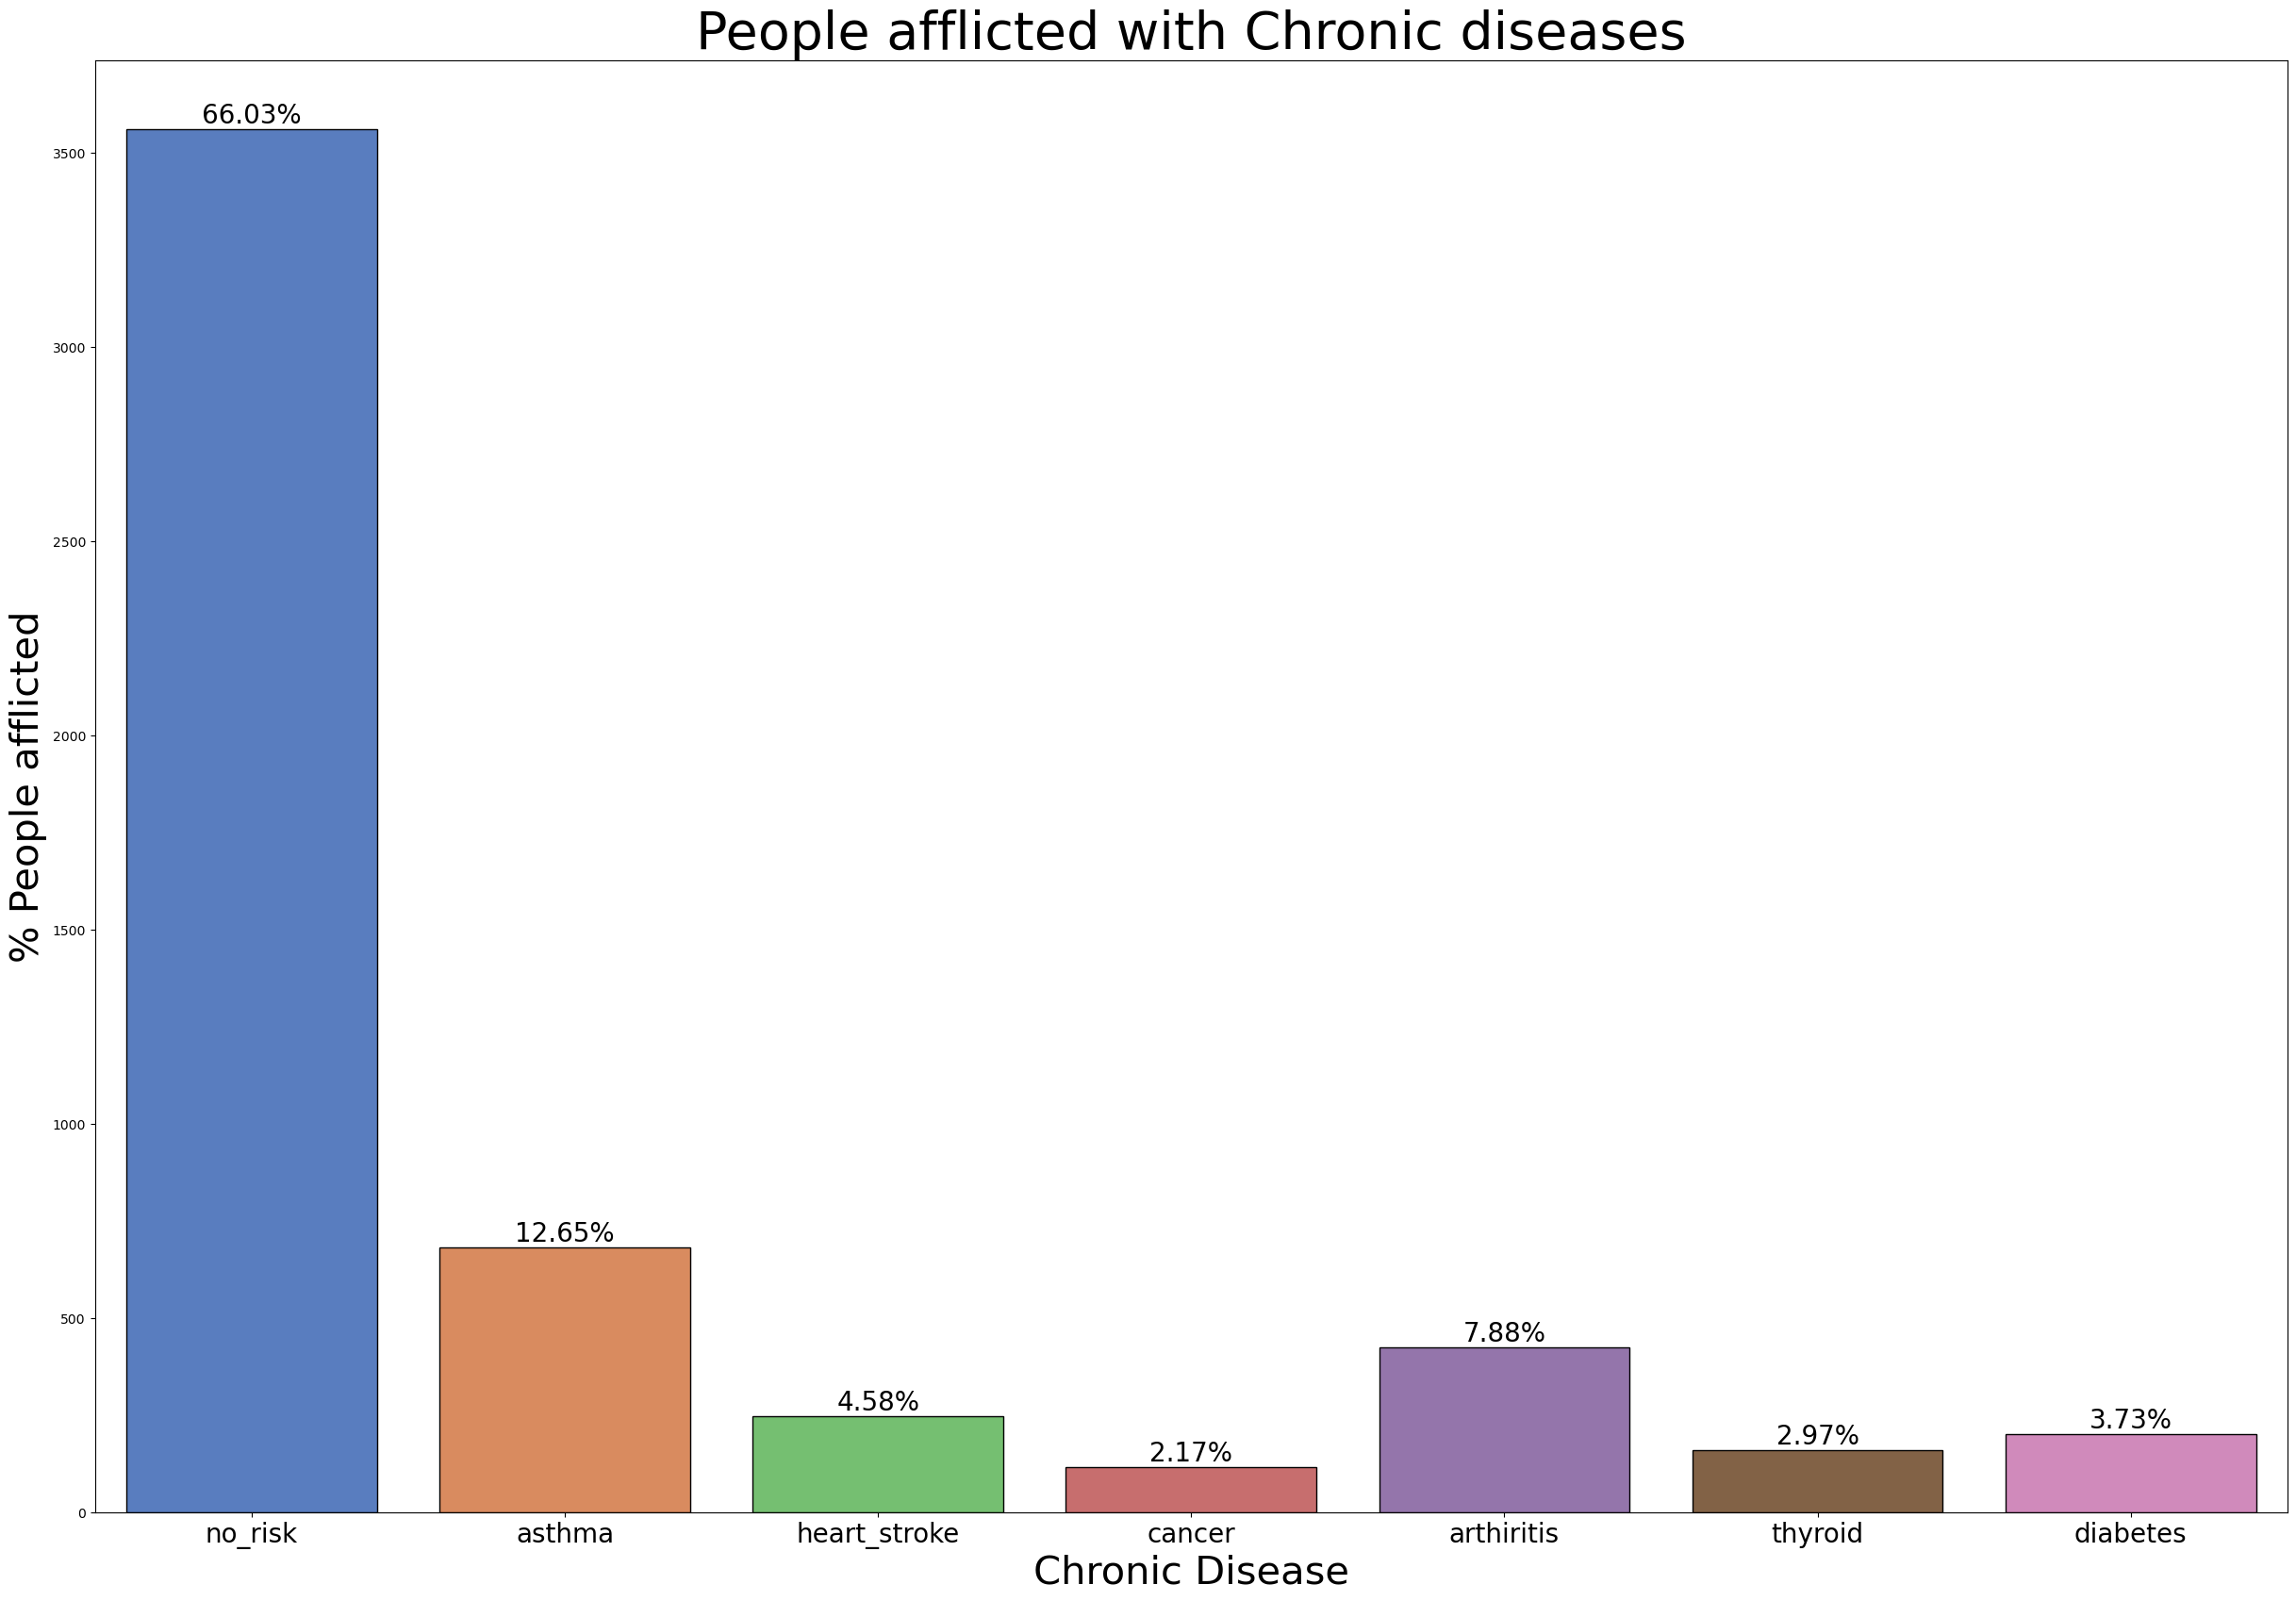

In [348]:
plt.figure(figsize=(30,20))

total = len(vd_cube)
percentages = vd_cube['comb_disease'].value_counts(normalize=True) * 100

ax=sns.countplot(data=vd_cube, x="comb_disease", edgecolor='k',palette='muted')
plt.title('People afflicted with Chronic diseases',fontsize=40)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height), fontsize=20,ha='center', va='center', color='black', xytext=(0, 10), textcoords='offset points')

plt.xticks(fontsize=20)
plt.xlabel('Chronic Disease',fontsize=30)
plt.ylabel('% People afflicted',fontsize=30)
plt.show()

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

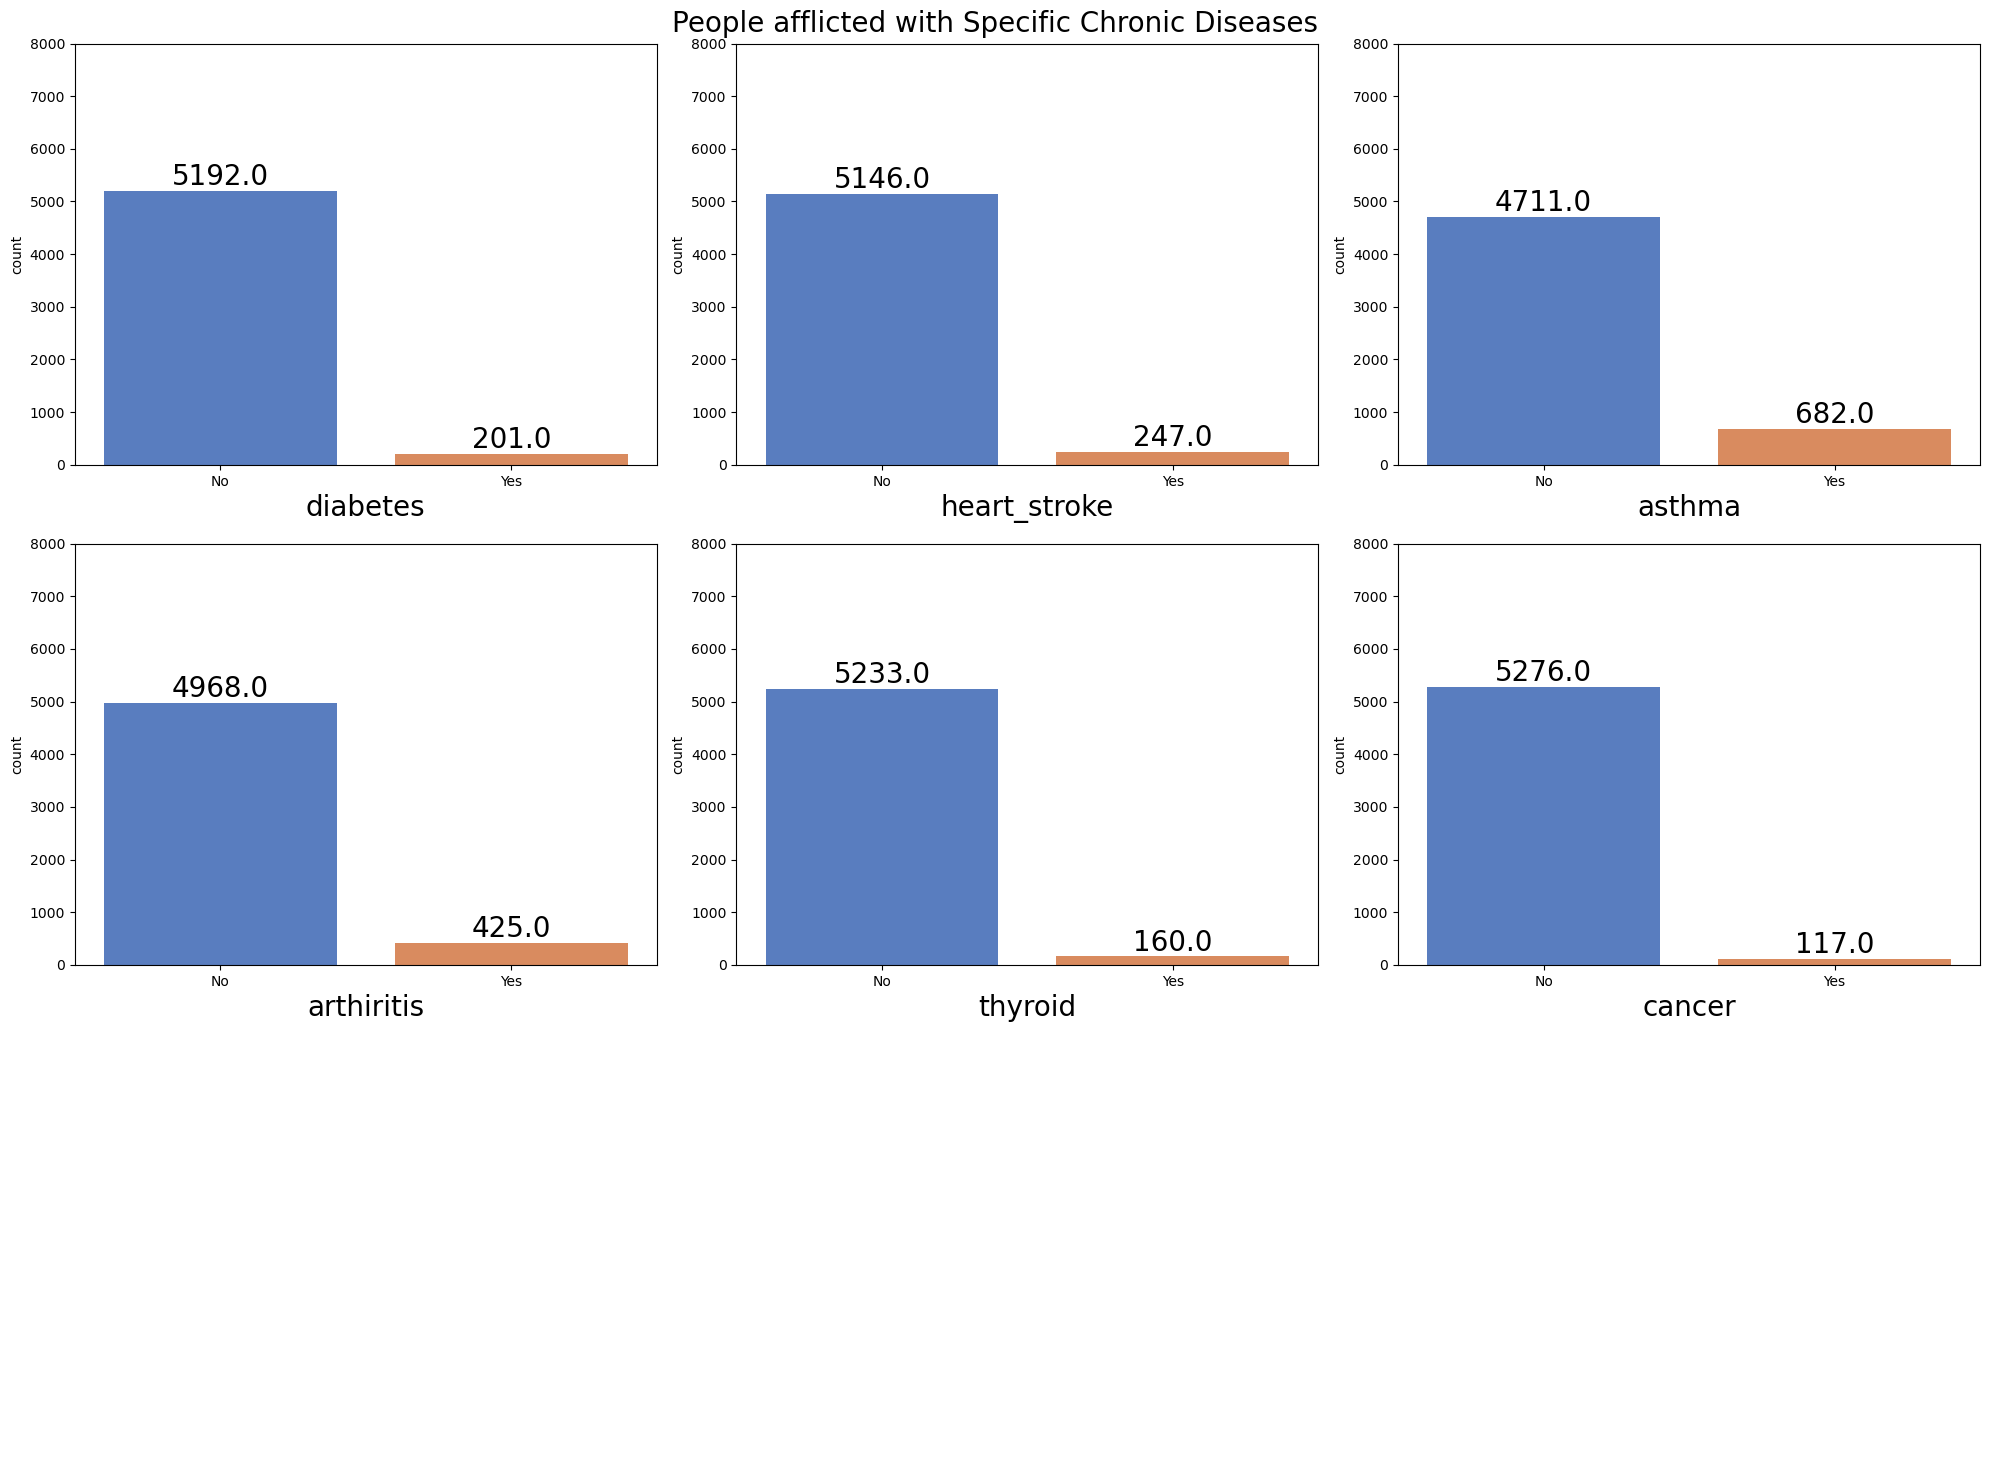

In [341]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('People afflicted with Specific Chronic Diseases', fontsize=20)

columns = ['diabetes', 'heart_stroke', 'asthma', 'arthiritis', 'thyroid', 'cancer']

for i, col in enumerate(columns):
    sns.countplot(data=vd_cube, x=col, palette="muted", ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xlabel(col, fontsize=20)
    axes[i//3, i%3].set_ylim(0, 8000)
    
    for p in axes[i//3, i%3].patches:
        height = p.get_height()
        axes[i//3, i%3].annotate(height, 
                                 (p.get_x() + p.get_width() / 2., height), 
                                 fontsize=20, ha='center', va='center', 
                                 xytext=(0, 10), textcoords='offset points')

# Hiding the last row as per your code
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

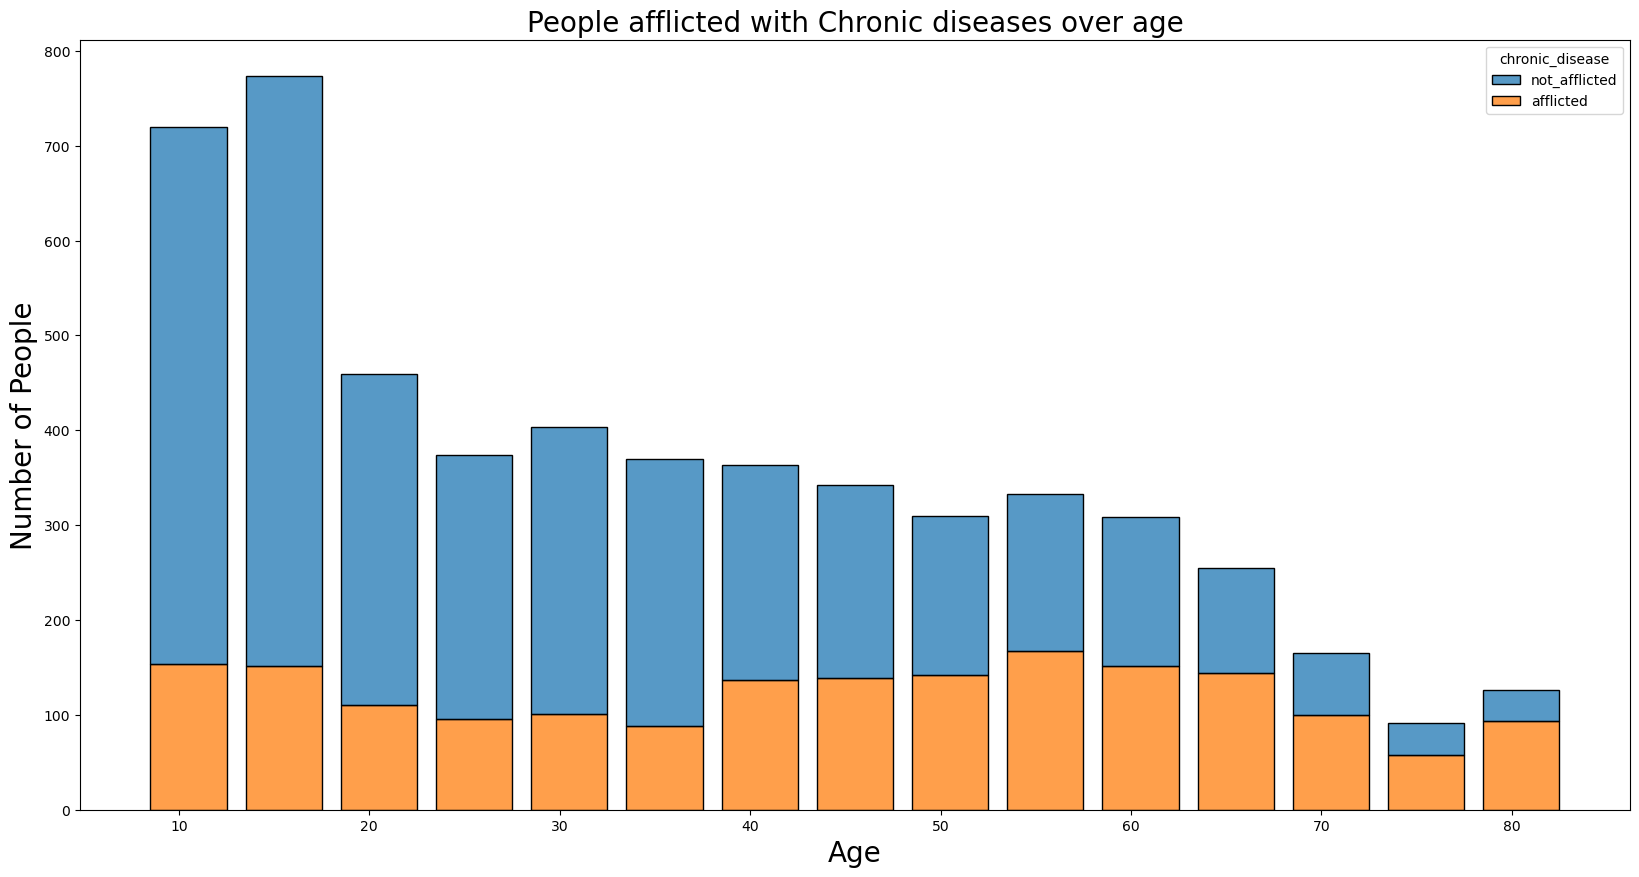

In [79]:
plt.figure(figsize=(20,10))

sns.histplot(data=vd_cube, x="Age", bins=range(5,100,5),hue='chronic_disease',color='yellow' , edgecolor='k',multiple='stack',binwidth=5,shrink=0.8)
plt.title('People afflicted with Chronic diseases over age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.show()

C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\navan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Cholestrol Vs Exercise')

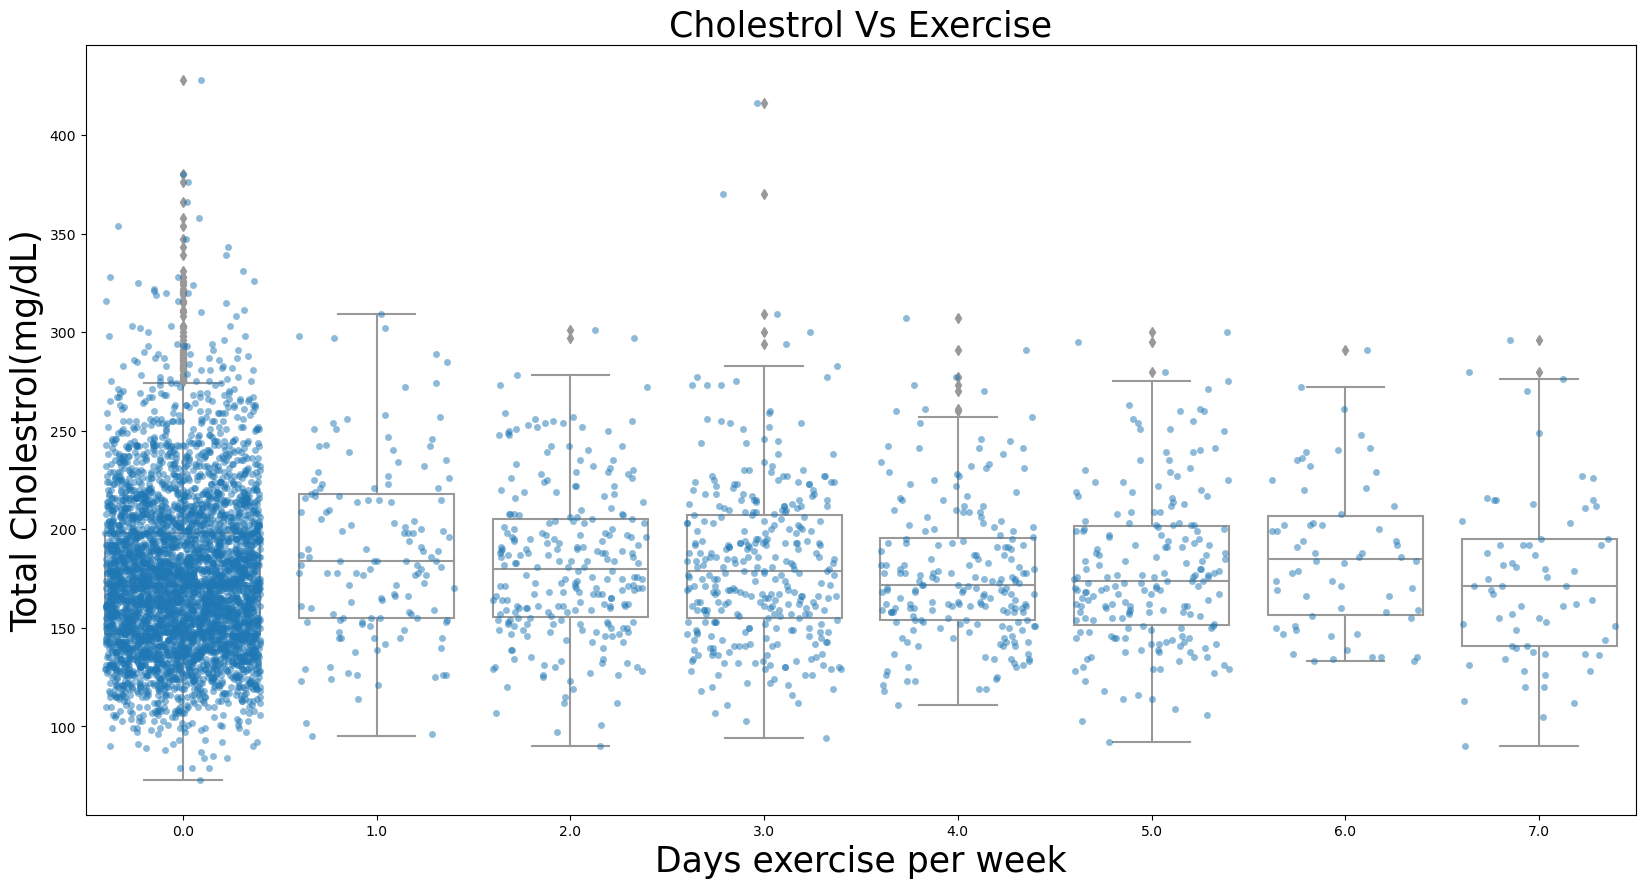

In [80]:
plt.figure(figsize=(20,10))
sns.stripplot(data=vd_cube,x="exercise_days_per_week",y="tot_cholestrol_mgperdL",order=sorted(vd_cube["exercise_days_per_week"].unique()),size=5,jitter=0.4,alpha=0.5)
sns.boxplot(data=vd_cube,x="exercise_days_per_week",y="tot_cholestrol_mgperdL",order=sorted(vd_cube["exercise_days_per_week"].unique()),color="w")
plt.xlabel("Days exercise per week",fontsize=25)
plt.ylabel("Total Cholestrol(mg/dL)",fontsize=25)
plt.title("Cholestrol Vs Exercise",fontsize=25)

In [81]:
fig = px.scatter(vd_cube,x="body_mass_index", y="avgday_Energy_in_kcal", color="chronic_disease",color_discrete_sequence=['gray', 'green'],opacity=0.5,
                title='Effect of Calorie intake and Body Mass Index on Chronic Disease')
fig.show()


In [82]:
cleaned_data_cube.columns

Index(['SEQN', 'diabetes', 'kidney_failure', 'heart_stroke', 'asthma',
       'arthiritis', 'thyroid', 'cancer', 'comb_disease', 'chronic_disease',
       'Gender', 'Age', 'Race', 'Country', 'Ratio_Famincome_to_Pov',
       'avgday_Energy_in_kcal', 'avgday_Protein_in_gm', 'avgday_Carb_in_gm',
       'avgday_sug_in_gm', 'avgday_diet_fib_in_gm', 'avgday_fat_in_gm',
       'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_A_in_mcg',
       'avgday_Vitamin_B1_in_mg', 'avgday_Vitamin_B2_in_mg', 'Vitamin_B6_mg',
       'Vitamin_B12_mg', 'added_Vitamin_B6_mg', 'Vitamin_C_mg',
       'avgday_Vitamin_D_in_mg', 'avgday_Vitamin_K_in_mg',
       'avgday_calcium_in_mg', 'avgday_phosporus_in_mg',
       'avgday_magnesium_in_mg', 'avgday_iron_in_mg', 'avgday_zinc_in_mg',
       'avgday_copper_in_mg', 'avgday_sodium_in_mg', 'avgday_potassium_in_mg',
       'avgday_selenium_in_mg', 'avgday_caffeine_in_mg', 'supplements_taken',
       'avg_pulse_rate', 'body_mass_index', 'tot_cholestrol_mgperdL',
       'white

In [83]:
features=condensed_cube.drop(columns=['SEQN','diabetes','kidney_failure','heart_stroke','asthma','arthiritis','thyroid',
                                        'cancer','comb_disease','chronic_disease','count'])

### Correlation Analysis

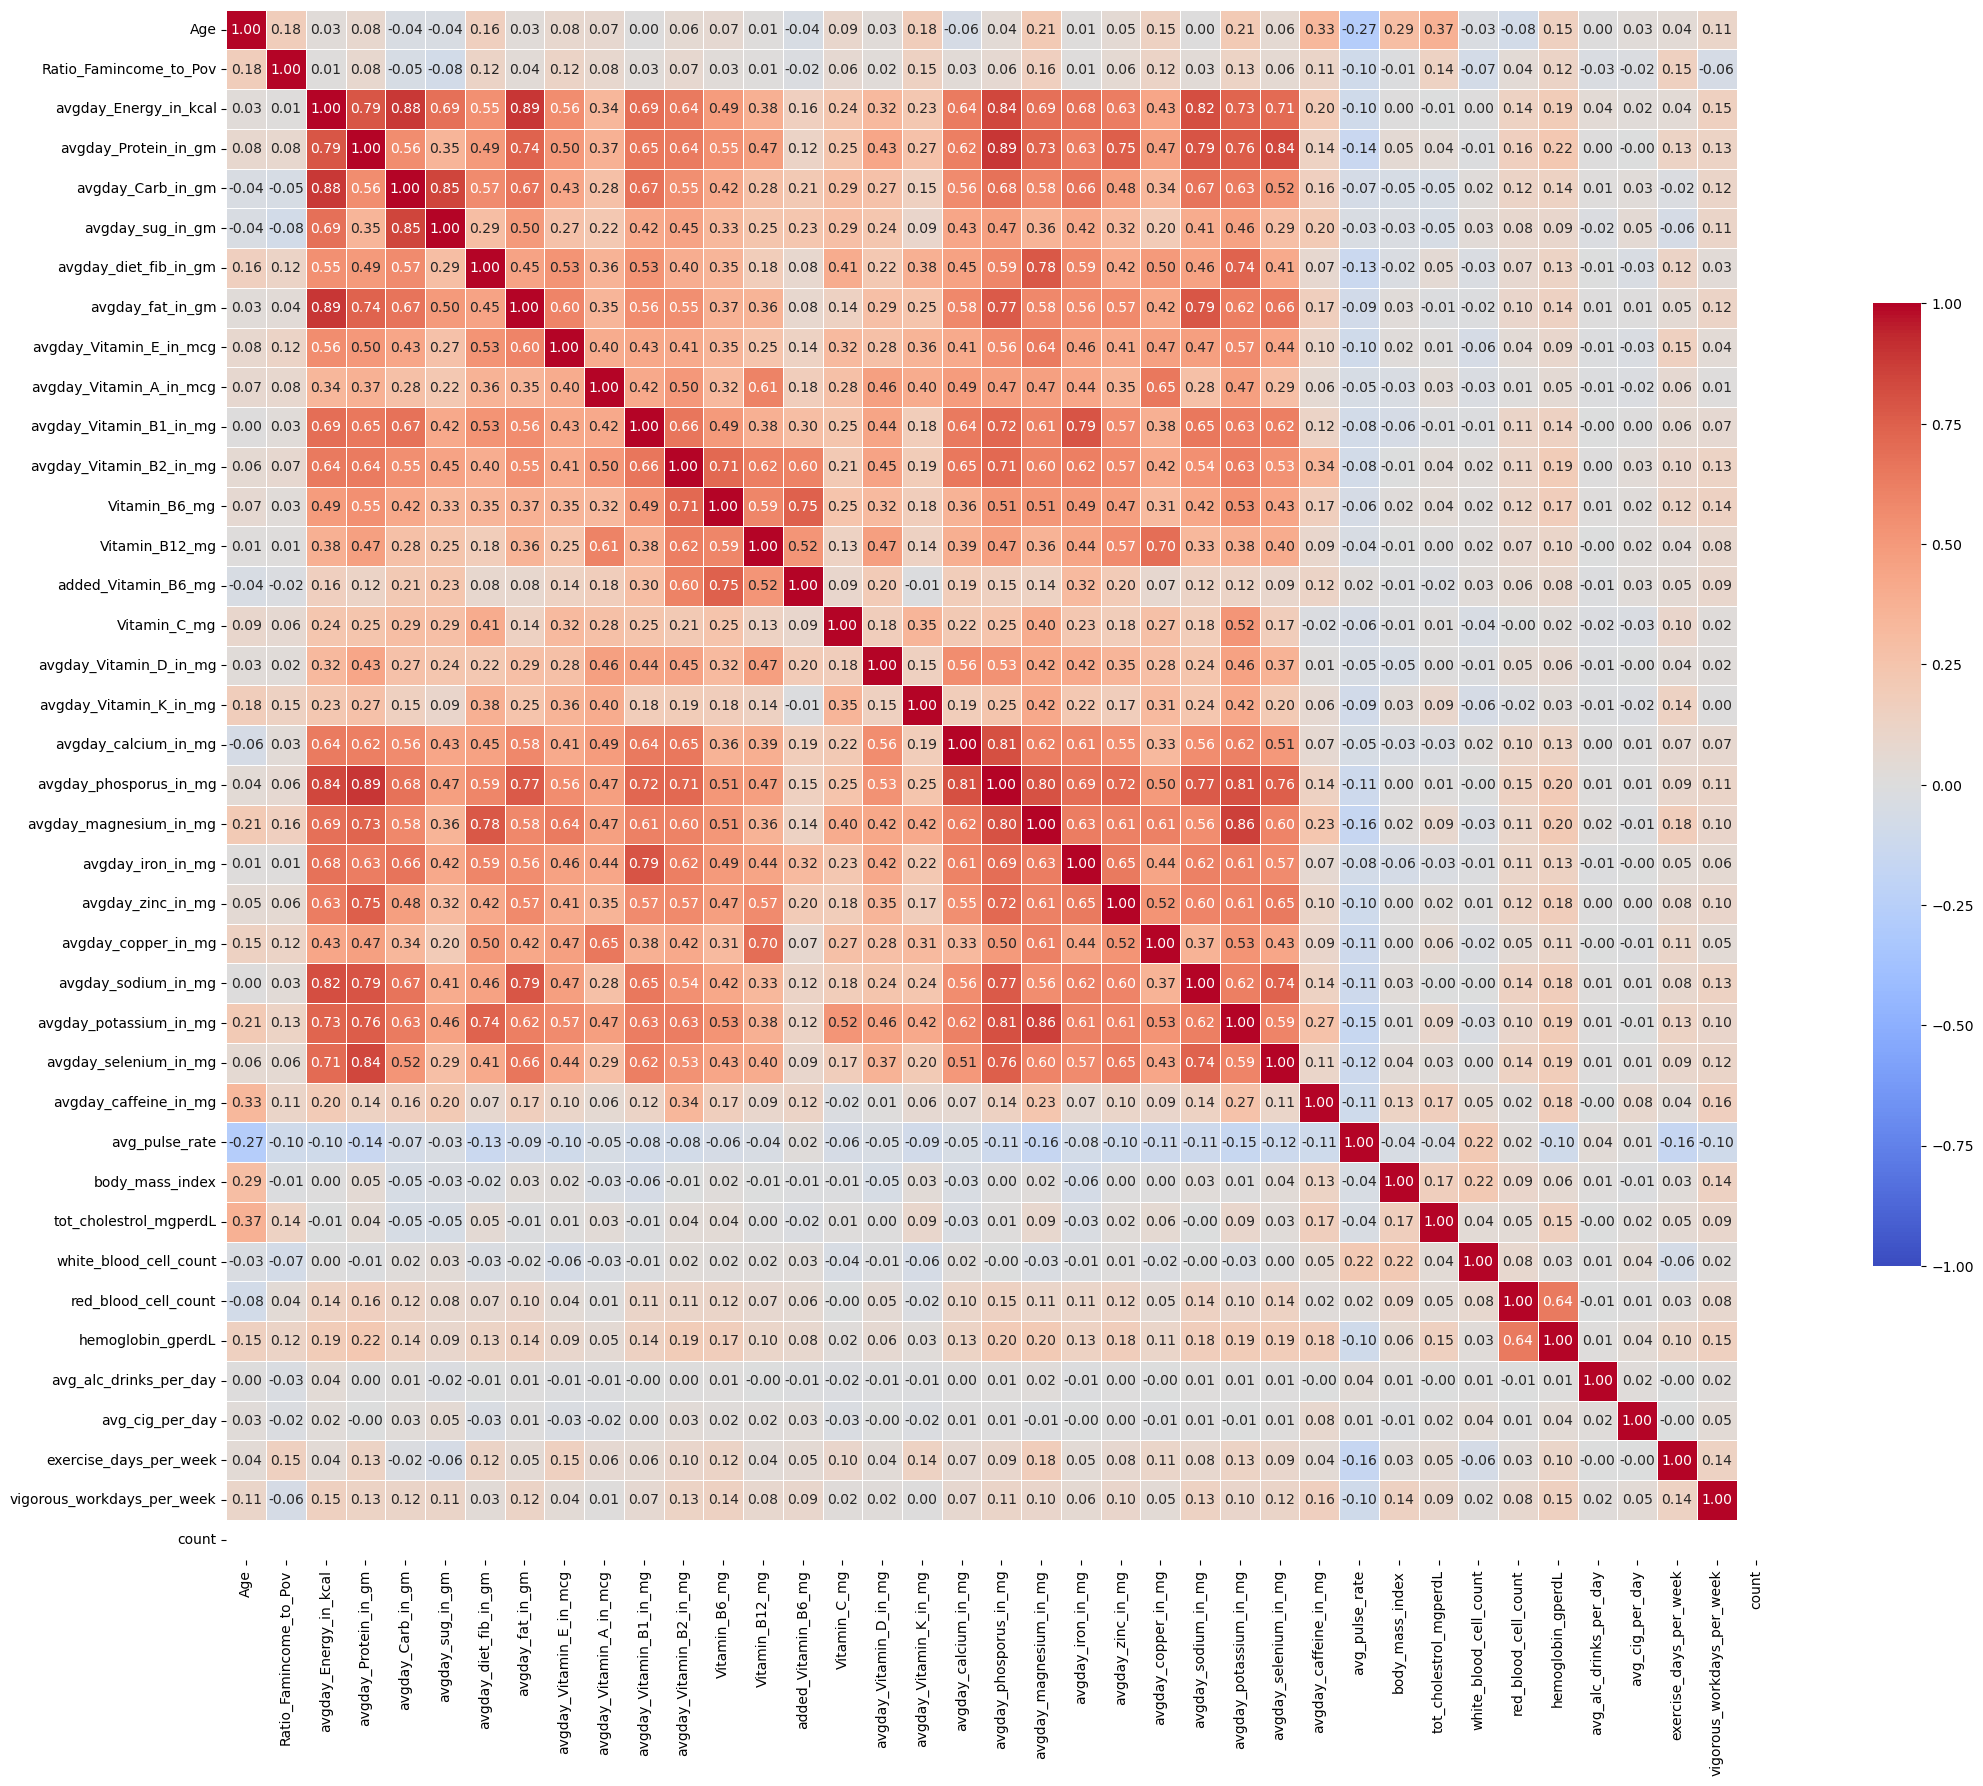

In [84]:
numerical_features_set=vd_cube.select_dtypes(include=['number']).drop(columns=['SEQN'])

data = numerical_features_set.corr()
plt.figure(figsize=(25,25))
sns.heatmap(data=data,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
data.to_csv('./Outputs/correlation.csv')

In [86]:
# Based on the above correlation grid, we found that features like avgday_Energy_in_kcal,avgday_Protein_in_gm, avgday_Carb_in_gm,avgday_fat_in_gm exhibit stronger inter correlation among themselves. so we can directly remove it from the features. This is because all these food components are proprtional to each other
# And also chemical components like avgday_phosporus_in_mg,avgday_magnesium_in_mg,avgday_iron_in_mg,avgday_zinc_in_mg,avgday_copper_in_mg,avgday_sodium_in_mg,avgday_potassium_in_mg,avgday_selenium_in_mg also exhibitb higher correlation with food intake substances as they are the ingredient components of the food. so we can directly remove it from the features
 # The final feature set that could be used for modelling is below

In [87]:
features.columns

Index(['Gender', 'Age', 'Race', 'Country', 'Ratio_Famincome_to_Pov',
       'avgday_Energy_in_kcal', 'avgday_Protein_in_gm', 'avgday_Carb_in_gm',
       'avgday_sug_in_gm', 'avgday_diet_fib_in_gm', 'avgday_fat_in_gm',
       'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_A_in_mcg',
       'avgday_Vitamin_B1_in_mg', 'avgday_Vitamin_B2_in_mg', 'Vitamin_B6_mg',
       'Vitamin_B12_mg', 'added_Vitamin_B6_mg', 'Vitamin_C_mg',
       'avgday_Vitamin_D_in_mg', 'avgday_Vitamin_K_in_mg',
       'avgday_calcium_in_mg', 'avgday_phosporus_in_mg',
       'avgday_magnesium_in_mg', 'avgday_iron_in_mg', 'avgday_zinc_in_mg',
       'avgday_copper_in_mg', 'avgday_sodium_in_mg', 'avgday_potassium_in_mg',
       'avgday_selenium_in_mg', 'avgday_caffeine_in_mg', 'supplements_taken',
       'avg_pulse_rate', 'body_mass_index', 'tot_cholestrol_mgperdL',
       'white_blood_cell_count', 'red_blood_cell_count', 'hemoglobin_gperdL',
       'avg_alc_drinks_per_day', 'avg_cig_per_day', 'exercise_days_per_week',
     

In [88]:
features_filtered=features.drop(columns=['avgday_Protein_in_gm', 'avgday_Carb_in_gm','avgday_fat_in_gm','avgday_phosporus_in_mg','avgday_magnesium_in_mg','avgday_iron_in_mg','avgday_zinc_in_mg','avgday_copper_in_mg','avgday_sodium_in_mg','avgday_potassium_in_mg','avgday_selenium_in_mg'])

In [359]:
features_filtered.shape

(5393, 32)

# 3. Model Pre-processing

In [89]:
X=pd.concat([features_filtered.select_dtypes(include=['object']),features_filtered.select_dtypes(include=np.number)],axis=1)
y=condensed_cube['comb_disease']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,stratify=y,random_state=381)

In [91]:
X_train.select_dtypes(include=['number']).mean()

Age                             35.260547
Ratio_Famincome_to_Pov           2.572174
avgday_Energy_in_kcal         2058.340056
avgday_sug_in_gm               103.447589
avgday_diet_fib_in_gm           15.743185
avgday_Vitamin_E_in_mcg          8.653425
avgday_Vitamin_A_in_mcg        568.437645
avgday_Vitamin_B1_in_mg          1.544437
avgday_Vitamin_B2_in_mg          1.875000
Vitamin_B6_mg                    1.950669
Vitamin_B12_mg                   4.537395
added_Vitamin_B6_mg              0.847966
Vitamin_C_mg                    74.392895
avgday_Vitamin_D_in_mg           4.366609
avgday_Vitamin_K_in_mg         107.909678
avgday_calcium_in_mg           906.638503
avgday_caffeine_in_mg          101.286161
avg_pulse_rate                  71.953330
body_mass_index                 27.456560
tot_cholestrol_mgperdL         176.813166
white_blood_cell_count           7.093556
red_blood_cell_count             4.777703
hemoglobin_gperdL               13.968822
avg_alc_drinks_per_day           2

In [92]:
X_train.select_dtypes(include=['number']).std()

Age                            20.183078
Ratio_Famincome_to_Pov          1.655631
avgday_Energy_in_kcal         859.947889
avgday_sug_in_gm               61.383452
avgday_diet_fib_in_gm           8.935242
avgday_Vitamin_E_in_mcg         5.554795
avgday_Vitamin_A_in_mcg       554.343386
avgday_Vitamin_B1_in_mg         0.783677
avgday_Vitamin_B2_in_mg         1.098789
Vitamin_B6_mg                   1.458989
Vitamin_B12_mg                  5.460710
added_Vitamin_B6_mg             2.307910
Vitamin_C_mg                   70.801980
avgday_Vitamin_D_in_mg          4.487042
avgday_Vitamin_K_in_mg        133.583090
avgday_calcium_in_mg          490.523055
avgday_caffeine_in_mg         151.747312
avg_pulse_rate                 12.136994
body_mass_index                 7.404403
tot_cholestrol_mgperdL         39.612210
white_blood_cell_count          2.135707
red_blood_cell_count            0.458583
hemoglobin_gperdL               1.491947
avg_alc_drinks_per_day         37.237931
avg_cig_per_day 

In [93]:

preprocessor=make_pipeline(make_column_transformer((OneHotEncoder(sparse=False,drop='first'),make_column_selector(dtype_include=object)),
    (StandardScaler(),make_column_selector(dtype_include=np.number)),
                              remainder='passthrough'))



train_transformed=preprocessor.fit_transform(X_train).round(2)
test_transformed=preprocessor.fit_transform(X_test).round(2)


encoded_column_names = preprocessor.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out()
transformed_column_names = list(encoded_column_names) + list(X_train.select_dtypes(include=np.number).columns)


X_train_prep=pd.DataFrame(train_transformed,columns=transformed_column_names)
X_test_prep=pd.DataFrame(test_transformed,columns=transformed_column_names)

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [94]:
X_train_prep.head()

Gender_M  Race_NHA  Race_NHB  Race_NHW  Race_OHP  Race_others  Country_US  \
0       0.0       1.0       0.0       0.0       0.0          0.0         0.0   
1       1.0       0.0       0.0       1.0       0.0          0.0         1.0   
2       1.0       0.0       0.0       0.0       0.0          1.0         1.0   
3       0.0       0.0       0.0       1.0       0.0          0.0         0.0   
4       1.0       0.0       1.0       0.0       0.0          0.0         1.0   

   supplements_taken_Yes  access_to_healthcare_Yes   Age  ...  avg_pulse_rate  \
0                    1.0                       1.0  0.78  ...           -0.13   
1                    1.0                       1.0 -0.71  ...           -0.77   
2                    1.0                       1.0  0.43  ...           -0.02   
3                    0.0                       0.0 -0.36  ...            0.91   
4                    1.0                       1.0  0.38  ...           -0.71   

   body_mass_index  tot_cholestrol_mgperdL  white_blood_cell_count  \
0             0.01                    2.55                    0.75   
1            -0.37                    0.64                    0.05   
2            -0.35                    0.66                   -0.98   
3            -1.22                   -0.20                   -0.84   
4             0.38                    0.81                   -1.21   

   red_blood_cell_count  hemoglobin_gperdL  avg_alc_drinks_per_day  \
0                 -0.56              -0.52                   -0.07   
1                  0.70               0.96                    0.01   
2                  0.48               0.62                    0.01   
3                 -0.02               0.02                   -0.05   
4                  0.68               1.16                   -0.02   

   avg_cig_per_day  exercise_days_per_week  vigorous_workdays_per_week  
0            -0.28                   -0.48                       -0.46  
1            -0.28                    1.98                       -0.46  
2            -0.28                    1.37                       -0.46  
3            -0.28                   -0.48                       -0.46  
4            -0.28                    2.60                       -0.46  

[5 rows x 36 columns]

In [95]:
X_test_prep.head()

Gender_M  Race_NHA  Race_NHB  Race_NHW  Race_OHP  Race_others  Country_US  \
0       0.0       0.0       0.0       1.0       0.0          0.0         1.0   
1       0.0       0.0       0.0       1.0       0.0          0.0         1.0   
2       1.0       0.0       0.0       1.0       0.0          0.0         1.0   
3       1.0       0.0       0.0       1.0       0.0          0.0         1.0   
4       0.0       0.0       0.0       0.0       1.0          0.0         0.0   

   supplements_taken_Yes  access_to_healthcare_Yes   Age  ...  avg_pulse_rate  \
0                    1.0                       1.0 -1.13  ...           -0.06   
1                    0.0                       1.0 -1.29  ...           -1.27   
2                    1.0                       1.0  1.94  ...            0.10   
3                    0.0                       1.0  0.08  ...           -0.61   
4                    0.0                       0.0  0.08  ...            0.21   

   body_mass_index  tot_cholestrol_mgperdL  white_blood_cell_count  \
0            -1.36                   -0.12                    0.31   
1            -0.30                   -0.49                   -0.46   
2            -0.30                    1.91                   -0.67   
3             0.22                    0.19                    0.18   
4            -0.47                    0.39                    1.46   

   red_blood_cell_count  hemoglobin_gperdL  avg_alc_drinks_per_day  \
0                  0.70               0.61                   -0.08   
1                  0.35              -0.75                   -0.08   
2                  0.76               1.08                   -0.03   
3                 -0.80              -0.41                   -0.01   
4                 -0.21              -0.41                   -0.01   

   avg_cig_per_day  exercise_days_per_week  vigorous_workdays_per_week  
0            -0.08                   -0.48                       -0.48  
1            -0.08                   -0.48                       -0.48  
2            -0.08                    1.37                        1.08  
3             0.57                    2.59                        2.64  
4            -0.08                   -0.48                        1.08  

[5 rows x 36 columns]

In [96]:
X_train_prep.shape

(4314, 36)

In [97]:
X_test_prep.shape

(1079, 36)

In [98]:
X_train_prep.mean()

Gender_M                      5.081131e-01
Race_NHA                      1.198424e-01
Race_NHB                      2.352805e-01
Race_NHW                      3.365786e-01
Race_OHP                      9.712564e-02
Race_others                   6.629578e-02
Country_US                    7.686602e-01
supplements_taken_Yes         4.323134e-01
access_to_healthcare_Yes      8.331015e-01
Age                           4.566528e-04
Ratio_Famincome_to_Pov        7.023644e-04
avgday_Energy_in_kcal        -4.636069e-06
avgday_sug_in_gm             -3.708855e-05
avgday_diet_fib_in_gm        -2.781641e-05
avgday_Vitamin_E_in_mcg       1.274919e-04
avgday_Vitamin_A_in_mcg      -2.781641e-05
avgday_Vitamin_B1_in_mg      -1.159017e-05
avgday_Vitamin_B2_in_mg      -2.318034e-05
Vitamin_B6_mg                -2.586403e-17
Vitamin_B12_mg               -2.781641e-05
added_Vitamin_B6_mg          -1.629578e-03
Vitamin_C_mg                 -6.258693e-05
avgday_Vitamin_D_in_mg        3.940658e-05
avgday_Vita

In [99]:
X_train_prep.std()

Gender_M                      0.499992
Race_NHA                      0.324815
Race_NHB                      0.424223
Race_NHW                      0.472594
Race_OHP                      0.296163
Race_others                   0.248827
Country_US                    0.421738
supplements_taken_Yes         0.495455
access_to_healthcare_Yes      0.372928
Age                           0.999549
Ratio_Famincome_to_Pov        1.000907
avgday_Energy_in_kcal         1.000138
avgday_sug_in_gm              1.000117
avgday_diet_fib_in_gm         1.000108
avgday_Vitamin_E_in_mcg       1.000120
avgday_Vitamin_A_in_mcg       1.000064
avgday_Vitamin_B1_in_mg       1.000073
avgday_Vitamin_B2_in_mg       1.000108
Vitamin_B6_mg                 1.000043
Vitamin_B12_mg                1.000165
added_Vitamin_B6_mg           1.000694
Vitamin_C_mg                  1.000109
avgday_Vitamin_D_in_mg        1.000103
avgday_Vitamin_K_in_mg        1.000013
avgday_calcium_in_mg          1.000110
avgday_caffeine_in_mg    

In [100]:
X_test_prep.mean()

Gender_M                      5.097312e-01
Race_NHA                      1.167748e-01
Race_NHB                      2.372567e-01
Race_NHW                      3.493976e-01
Race_OHP                      9.545876e-02
Race_others                   5.560704e-02
Country_US                    7.534754e-01
supplements_taken_Yes         4.124189e-01
access_to_healthcare_Yes      8.137164e-01
Age                           4.819277e-04
Ratio_Famincome_to_Pov        2.687674e-04
avgday_Energy_in_kcal        -4.633920e-05
avgday_sug_in_gm             -9.267841e-06
avgday_diet_fib_in_gm        -5.560704e-05
avgday_Vitamin_E_in_mcg       9.267841e-06
avgday_Vitamin_A_in_mcg      -1.297498e-04
avgday_Vitamin_B1_in_mg       6.487488e-05
avgday_Vitamin_B2_in_mg      -1.482854e-04
Vitamin_B6_mg                -1.297498e-04
Vitamin_B12_mg               -6.487488e-05
added_Vitamin_B6_mg          -1.853568e-05
Vitamin_C_mg                  1.482854e-04
avgday_Vitamin_D_in_mg        3.707136e-05
avgday_Vita

In [101]:
X_test_prep.std()

Gender_M                      0.500137
Race_NHA                      0.321301
Race_NHB                      0.425598
Race_NHW                      0.477001
Race_OHP                      0.293984
Race_others                   0.229268
Country_US                    0.431187
supplements_taken_Yes         0.492498
access_to_healthcare_Yes      0.389516
Age                           0.999879
Ratio_Famincome_to_Pov        1.001206
avgday_Energy_in_kcal         1.000498
avgday_sug_in_gm              1.000325
avgday_diet_fib_in_gm         1.000334
avgday_Vitamin_E_in_mcg       1.000297
avgday_Vitamin_A_in_mcg       1.000417
avgday_Vitamin_B1_in_mg       1.000494
avgday_Vitamin_B2_in_mg       1.000713
Vitamin_B6_mg                 1.000444
Vitamin_B12_mg                1.000525
added_Vitamin_B6_mg           1.000501
Vitamin_C_mg                  1.000445
avgday_Vitamin_D_in_mg        1.000694
avgday_Vitamin_K_in_mg        1.000488
avgday_calcium_in_mg          1.000481
avgday_caffeine_in_mg    

In [102]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [103]:
#pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [104]:
#pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
#from imblearn.over_sampling import SMOTE

In [106]:


# Assuming X_train and y_train are your feature and target training sets
# Apply SMOTE
#smote = SMOTE(random_state=42)
#X_train_prep, y_train = smote.fit_resample(X_train_prep, y_train)


# 4. Initial Model Building

## 4.1 Logistic Regression

In [108]:

## Running a initial LogisticRegression model with preprocessed training data

lgr = LogisticRegression()
lgr_model_1 = lgr.fit(X_train_prep,y_train)
y_pred = lgr_model_1.predict(X_test_prep)


C:\Users\navan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [109]:
lgr.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

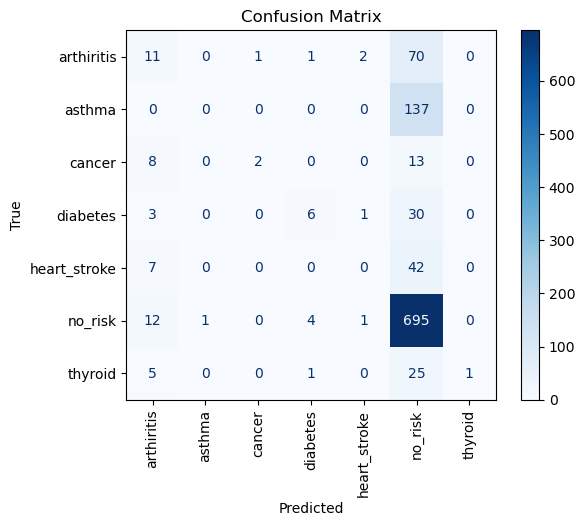

In [110]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [111]:
lgr_model_1_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",lgr_model_1_acc,"%")

Model Accuracy: 66.27 %


## 4.2 Decision Tree

In [112]:

## Running a initial Decision Tree Classifier model with the training data

dt = DecisionTreeClassifier()
dt_model_1 = dt.fit(X_train_prep,y_train)
y_pred = dt_model_1.predict(X_test_prep)



In [113]:
dt.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

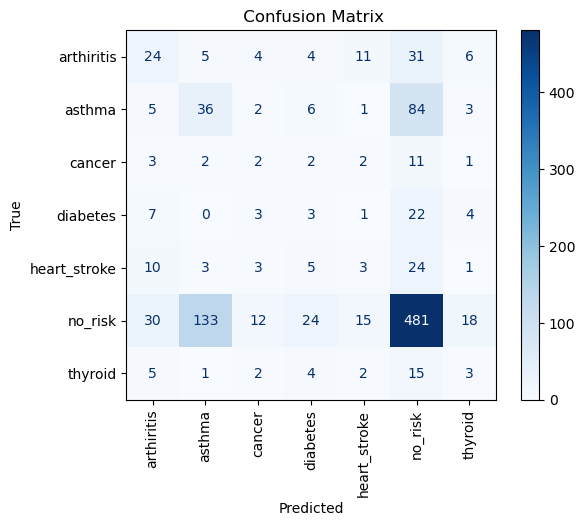

In [114]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title(' Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [115]:
dt_model_1_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",dt_model_1_acc,"%")

Model Accuracy: 51.16 %


## 4.3 Random Forest

In [116]:

## Running a initial Random Forest Classifier model with the training data

rf = RandomForestClassifier()
rf_model_1 = rf.fit(X_train_prep,y_train)
y_pred = rf_model_1.predict(X_test_prep)


In [117]:
rf.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

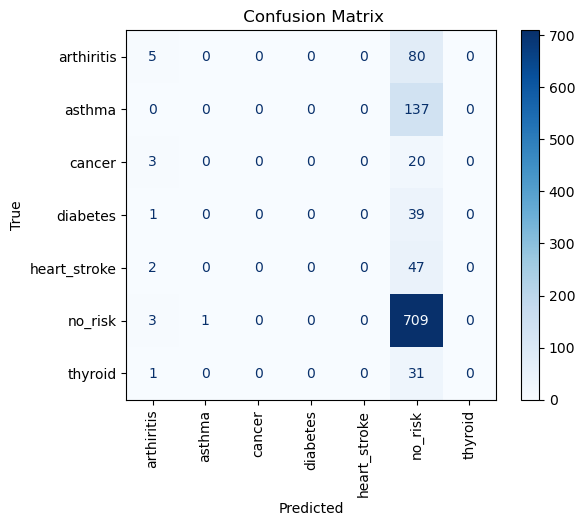

In [118]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title(' Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [119]:
rf_model_1_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",rf_model_1_acc,"%")

Model Accuracy: 66.17 %


## 4.4 KNeighbours Classifier

In [120]:

## Running ainitial KNeighbors Classifier model with the training data

knc = KNeighborsClassifier()
knc_model_1 = knc.fit(X_train_prep,y_train)
y_pred = knc_model_1.predict(X_test_prep)


In [121]:
knc.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

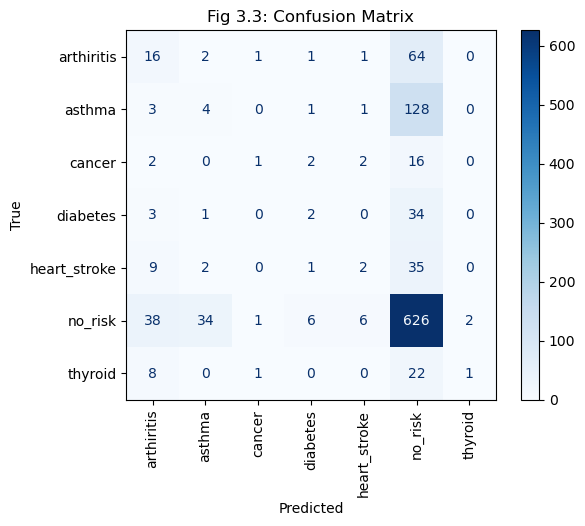

In [122]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Fig 3.3: Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [123]:
knc_model_1_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",knc_model_1_acc,"%")

Model Accuracy: 60.43 %


## 4.5 Support Vector Machine

In [124]:

## Running a initial Support Vector Machine model with the training data

svc = SVC()
svc_model_1 = svc.fit(X_train_prep,y_train)
y_pred = svc_model_1.predict(X_test_prep)


In [125]:
svc.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

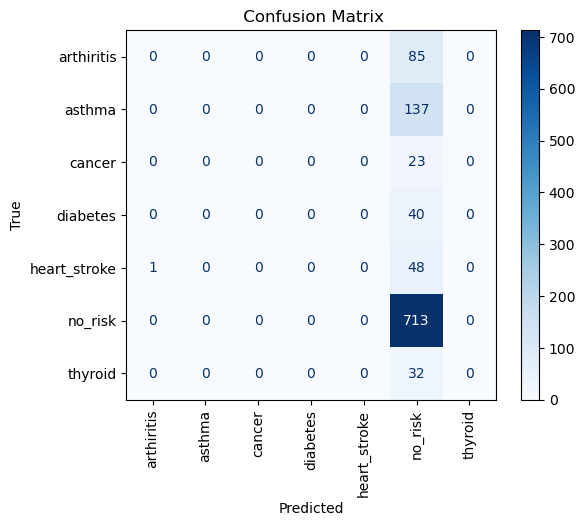

In [126]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title(' Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [127]:
svc_model_1_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",svc_model_1_acc,"%")

Model Accuracy: 66.08 %


## 4.6 Neural Networks

In [128]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Check the mapping of classes to numerical values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class mapping:", class_mapping)


Class mapping: {'arthiritis': 0, 'asthma': 1, 'cancer': 2, 'diabetes': 3, 'heart_stroke': 4, 'no_risk': 5, 'thyroid': 6}


In [129]:
y_train_encoded

array([5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 6, 2, 5, 5, 5, 1,
       6, 5, 0, 5, 5, 5, 5, 1, ..., 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 1,
       1, 5, 5, 0, 0, 5, 0, 5, 5, 4, 5, 5, 5, 5, 1, 5, 5])

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Adding layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))  # Input layer

# Adding 8 hidden layers
for _ in range(8):
    model.add(Dense(64, activation='relu'))  # Hidden layers

# Output layer for multiclass classification
num_classes = len(np.unique(y_train))  # Number of unique classes
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax

# Compile the model for multiclass classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model_1 = model.fit(X_train_prep, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_test_prep,y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_prep, y_test_encoded)
nn_model_1_acc=round(test_acc*100,2)
print('Test accuracy:', nn_model_1_acc,"%")

Epoch 1/5
68/68 [==============================] - 4s 12ms/step - loss: 1.3019 - accuracy: 0.6405 - val_loss: 1.1120 - val_accuracy: 0.6608
Epoch 2/5
68/68 [==============================] - 0s 5ms/step - loss: 1.0909 - accuracy: 0.6602 - val_loss: 1.0626 - val_accuracy: 0.6608
Epoch 3/5
68/68 [==============================] - 0s 5ms/step - loss: 1.0483 - accuracy: 0.6602 - val_loss: 1.0408 - val_accuracy: 0.6608
Epoch 4/5
68/68 [==============================] - 0s 5ms/step - loss: 1.0266 - accuracy: 0.6602 - val_loss: 1.0395 - val_accuracy: 0.6608
Epoch 5/5
34/34 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.6599
Test accuracy: 65.99 %


# 5. Forward Selection

## 5.1 Logistic Regression

In [131]:
%%time

lgr = LogisticRegression()
sfs = SequentialFeatureSelector(lgr, direction='forward',scoring='accuracy',  n_jobs=-1)

# Fit the SequentialFeatureSelector on training data
sfs.fit(X_train_prep, y_train)




CPU times: total: 1.84 s
Wall time: 1min 21s


SequentialFeatureSelector(estimator=LogisticRegression(), n_jobs=-1,
                          scoring='accuracy')

In [132]:
selected_indices=sfs.get_support(indices=True)

selected_features_mask = sfs.get_support()

# Get the indices of eliminated features
eliminated_indices = np.where(~selected_features_mask)[0]


In [133]:
lgr_eliminated_column_names = [transformed_column_names[i] for i in eliminated_indices]
print("eliminated_columns:",len(lgr_eliminated_column_names),"\n",lgr_eliminated_column_names)

eliminated_columns: 18 
 ['Race_NHW', 'supplements_taken_Yes', 'Age', 'Ratio_Famincome_to_Pov', 'avgday_Vitamin_A_in_mcg', 'avgday_Vitamin_B2_in_mg', 'Vitamin_B6_mg', 'avgday_Vitamin_D_in_mg', 'avgday_Vitamin_K_in_mg', 'avgday_calcium_in_mg', 'avgday_caffeine_in_mg', 'avg_pulse_rate', 'tot_cholestrol_mgperdL', 'white_blood_cell_count', 'red_blood_cell_count', 'avg_alc_drinks_per_day', 'avg_cig_per_day', 'vigorous_workdays_per_week']


In [134]:
lgr_selected_column_names = [transformed_column_names[i] for i in selected_indices]
print("selected_columns:",len(lgr_selected_column_names),"\n",lgr_selected_column_names)

selected_columns: 18 
 ['Gender_M', 'Race_NHA', 'Race_NHB', 'Race_OHP', 'Race_others', 'Country_US', 'access_to_healthcare_Yes', 'avgday_Energy_in_kcal', 'avgday_sug_in_gm', 'avgday_diet_fib_in_gm', 'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_B1_in_mg', 'Vitamin_B12_mg', 'added_Vitamin_B6_mg', 'Vitamin_C_mg', 'body_mass_index', 'hemoglobin_gperdL', 'exercise_days_per_week']


In [135]:

X_train_prep_filtered=X_train_prep[lgr_selected_column_names]
X_test_prep_filtered=X_test_prep[lgr_selected_column_names]


## Running a LogisticRegression models with the training data filtered for variables from Forward selection

lgr = LogisticRegression()
lgr_model_2 = lgr.fit(X_train_prep_filtered,y_train)
y_pred = lgr_model_2.predict(X_test_prep_filtered)


In [136]:
lgr.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

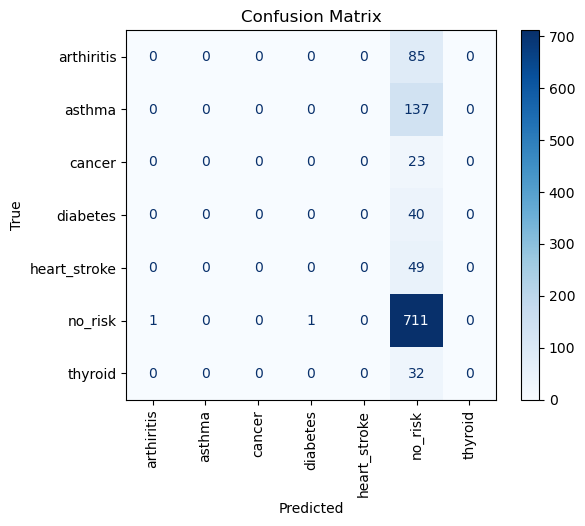

In [137]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [138]:
lgr_model_2_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",lgr_model_2_acc,"%")

Model Accuracy: 65.89 %



## 5.2 Decision Tree

In [139]:
%%time

dt = DecisionTreeClassifier()
sfs = SequentialFeatureSelector(dt, direction='forward',  n_jobs=-1)

# Fit the SequentialFeatureSelector on training data
sfs.fit(X_train_prep, y_train)




CPU times: total: 2.31 s
Wall time: 32.3 s


SequentialFeatureSelector(estimator=DecisionTreeClassifier(), n_jobs=-1)

In [140]:
selected_indices=sfs.get_support(indices=True)

selected_features_mask = sfs.get_support()

# Get the indices of eliminated features
eliminated_indices = np.where(~selected_features_mask)[0]


In [141]:
dt_eliminated_column_names = [transformed_column_names[i] for i in eliminated_indices]
print("eliminated_columns:",len(dt_eliminated_column_names),"\n",dt_eliminated_column_names)

eliminated_columns: 18 
 ['Ratio_Famincome_to_Pov', 'avgday_Energy_in_kcal', 'avgday_sug_in_gm', 'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_B1_in_mg', 'Vitamin_B6_mg', 'Vitamin_B12_mg', 'Vitamin_C_mg', 'avgday_Vitamin_D_in_mg', 'avgday_Vitamin_K_in_mg', 'avgday_calcium_in_mg', 'avgday_caffeine_in_mg', 'avg_pulse_rate', 'body_mass_index', 'tot_cholestrol_mgperdL', 'white_blood_cell_count', 'red_blood_cell_count', 'hemoglobin_gperdL']


In [142]:
dt_selected_column_names = [transformed_column_names[i] for i in selected_indices]
print("selected_columns:",len(dt_selected_column_names),"\n",dt_selected_column_names)

selected_columns: 18 
 ['Gender_M', 'Race_NHA', 'Race_NHB', 'Race_NHW', 'Race_OHP', 'Race_others', 'Country_US', 'supplements_taken_Yes', 'access_to_healthcare_Yes', 'Age', 'avgday_diet_fib_in_gm', 'avgday_Vitamin_A_in_mcg', 'avgday_Vitamin_B2_in_mg', 'added_Vitamin_B6_mg', 'avg_alc_drinks_per_day', 'avg_cig_per_day', 'exercise_days_per_week', 'vigorous_workdays_per_week']


In [143]:

X_train_prep_filtered=X_train_prep[dt_selected_column_names]
X_test_prep_filtered=X_test_prep[dt_selected_column_names]


## Running a DecisionTree models with the training data filtered for variables from Forward selection

dt = DecisionTreeClassifier()
dt_model_2 = dt.fit(X_train_prep_filtered,y_train)
y_pred = dt_model_2.predict(X_test_prep_filtered)


In [144]:
X_train_prep_filtered.shape

(4314, 18)

In [145]:
dt.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

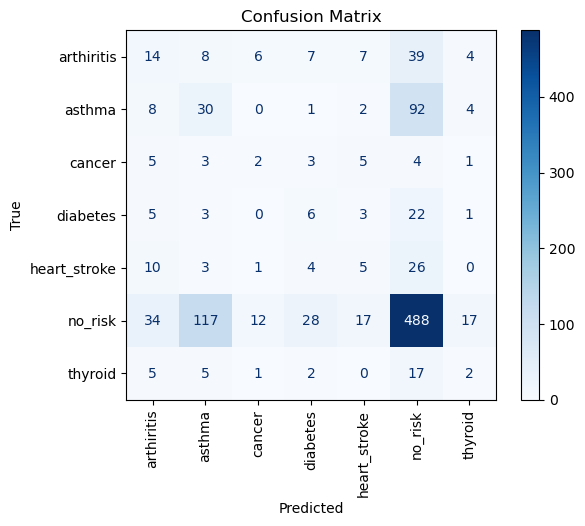

In [146]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [147]:
dt_model_2_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",dt_model_2_acc,"%")

Model Accuracy: 50.7 %


## 5.3 Random Forest Classifier

In [177]:
# Approximate run time for the cell
# CPU times: total: 3.02 s
# Wall time: 11min 36s

In [178]:
%%time

RF = RandomForestClassifier()
sfs = SequentialFeatureSelector(RF, direction='forward',  n_jobs=-1)

# Fit the SequentialFeatureSelector on training data
sfs.fit(X_train_prep, y_train)




CPU times: total: 2.05 s
Wall time: 11min 21s


SequentialFeatureSelector(estimator=RandomForestClassifier(), n_jobs=-1)

In [179]:
selected_indices=sfs.get_support(indices=True)

selected_features_mask = sfs.get_support()

# Get the indices of eliminated features
eliminated_indices = np.where(~selected_features_mask)[0]


In [180]:
rf_eliminated_column_names = [transformed_column_names[i] for i in eliminated_indices]
print("eliminated_columns:",len(rf_eliminated_column_names),"\n",rf_eliminated_column_names)

eliminated_columns: 18 
 ['Ratio_Famincome_to_Pov', 'avgday_Energy_in_kcal', 'avgday_sug_in_gm', 'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_A_in_mcg', 'avgday_Vitamin_B2_in_mg', 'Vitamin_B6_mg', 'Vitamin_B12_mg', 'added_Vitamin_B6_mg', 'Vitamin_C_mg', 'avgday_Vitamin_K_in_mg', 'avgday_calcium_in_mg', 'avgday_caffeine_in_mg', 'avg_pulse_rate', 'body_mass_index', 'tot_cholestrol_mgperdL', 'white_blood_cell_count', 'hemoglobin_gperdL']


In [328]:
rf_selected_column_names = [transformed_column_names[i] for i in selected_indices]
print("selected_columns:",len(rf_selected_column_names),"\n",rf_selected_column_names)

selected_columns: 18 
 ['Gender_M', 'Race_NHA', 'Race_NHB', 'Race_NHW', 'Race_OHP', 'Race_others', 'Country_US', 'supplements_taken_Yes', 'access_to_healthcare_Yes', 'Age', 'avgday_diet_fib_in_gm', 'avgday_Vitamin_B1_in_mg', 'avgday_Vitamin_D_in_mg', 'red_blood_cell_count', 'avg_alc_drinks_per_day', 'avg_cig_per_day', 'exercise_days_per_week', 'vigorous_workdays_per_week']


In [182]:

X_train_prep_filtered=X_train_prep[rf_selected_column_names]
X_test_prep_filtered=X_test_prep[rf_selected_column_names]


## Running a RandomClassifier models with the training data filtered for variables from Forward selection

rf = RandomForestClassifier()
rf_model_2 = rf.fit(X_train_prep_filtered,y_train)
y_pred = rf_model_2.predict(X_test_prep_filtered)



In [183]:
rf.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

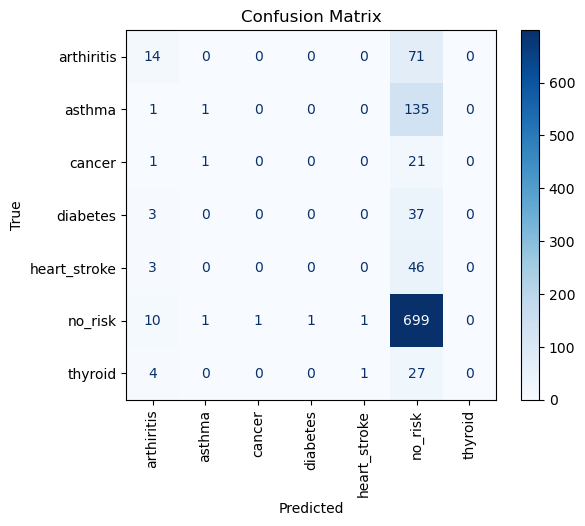

In [184]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [185]:
rf_model_2_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",rf_model_2_acc,"%")

Model Accuracy: 66.17 %


## 5.4 KNeighborsClassifier

In [148]:
%%time

knc = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knc, direction='forward',  n_jobs=-1)

# Fit the SequentialFeatureSelector on training data
sfs.fit(X_train_prep, y_train)




CPU times: total: 2.41 s
Wall time: 1min 2s


SequentialFeatureSelector(estimator=KNeighborsClassifier(), n_jobs=-1)

In [149]:
selected_indices=sfs.get_support(indices=True)

selected_features_mask = sfs.get_support()

# Get the indices of eliminated features
eliminated_indices = np.where(~selected_features_mask)[0]


In [150]:
knc_eliminated_column_names = [transformed_column_names[i] for i in eliminated_indices]
print("eliminated_columns:",len(knc_eliminated_column_names),"\n",knc_eliminated_column_names)

eliminated_columns: 18 
 ['Gender_M', 'Country_US', 'Ratio_Famincome_to_Pov', 'avgday_Energy_in_kcal', 'avgday_sug_in_gm', 'avgday_diet_fib_in_gm', 'avgday_Vitamin_E_in_mcg', 'avgday_Vitamin_B1_in_mg', 'avgday_Vitamin_B2_in_mg', 'added_Vitamin_B6_mg', 'Vitamin_C_mg', 'avgday_Vitamin_D_in_mg', 'avgday_Vitamin_K_in_mg', 'avgday_calcium_in_mg', 'avg_pulse_rate', 'body_mass_index', 'white_blood_cell_count', 'red_blood_cell_count']


In [151]:
knc_selected_column_names = [transformed_column_names[i] for i in selected_indices]
print("selected_columns:",len(knc_selected_column_names),"\n",knc_selected_column_names)

selected_columns: 18 
 ['Race_NHA', 'Race_NHB', 'Race_NHW', 'Race_OHP', 'Race_others', 'supplements_taken_Yes', 'access_to_healthcare_Yes', 'Age', 'avgday_Vitamin_A_in_mcg', 'Vitamin_B6_mg', 'Vitamin_B12_mg', 'avgday_caffeine_in_mg', 'tot_cholestrol_mgperdL', 'hemoglobin_gperdL', 'avg_alc_drinks_per_day', 'avg_cig_per_day', 'exercise_days_per_week', 'vigorous_workdays_per_week']


In [152]:

X_train_prep_filtered=X_train_prep[knc_selected_column_names]
X_test_prep_filtered=X_test_prep[knc_selected_column_names]


## Running a KNeighborsClassifier models with the training data filtered for variables from Forward selection

knc = KNeighborsClassifier()
knc_model_2 = knc.fit(X_train_prep_filtered,y_train)
y_pred = knc_model_2.predict(X_test_prep_filtered)


In [153]:
X_train_prep_filtered.shape

(4314, 18)

In [154]:
knc.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

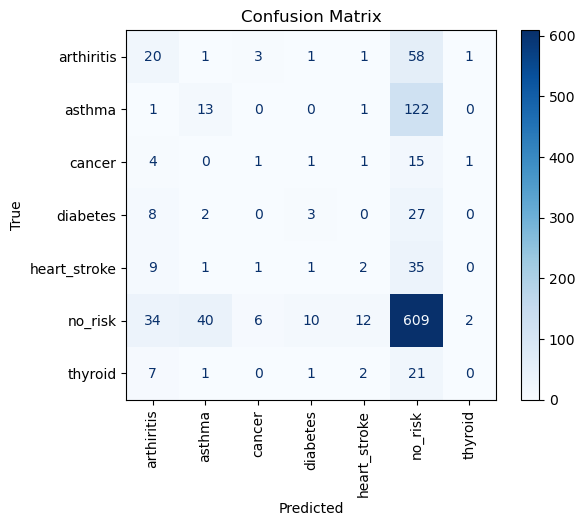

In [155]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [156]:
knc_model_2_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",knc_model_2_acc,"%")

Model Accuracy: 60.06 %


## 5.5 Support Vector Machine

Note: Forward Selection for Support Vector Machine is approximately taking 1 hr and the accuracy from it is not improving,
hence eliminating it from the execution, but the results are stored

In [ ]:
%%time

svc = SVC()
sfs = SequentialFeatureSelector(svc, direction='forward',  n_jobs=-1)

# Fit the SequentialFeatureSelector on training data
sfs.fit(X_train_prep, y_train)




In [ ]:
selected_indices=sfs.get_support(indices=True)

selected_features_mask = sfs.get_support()

# Get the indices of eliminated features
eliminated_indices = np.where(~selected_features_mask)[0]


In [ ]:
svc_eliminated_column_names = [transformed_column_names[i] for i in eliminated_indices]
 print("eliminated_columns:",len(svc_eliminated_column_names),"\n",svc_eliminated_column_names)

In [ ]:
svc_selected_column_names = [transformed_column_names[i] for i in selected_indices]
print("selected_columns:",len(svc_selected_column_names),"\n",svc_selected_column_names)

In [ ]:

X_train_prep_filtered=X_train_prep[svc_selected_column_names]
X_test_prep_filtered=X_test_prep[svc_selected_column_names]


## Running a Support Vector Machine models with the training data filtered for variables from Forward selection

svc = SVC()
svc_model_2 = svc.fit(X_train_prep_filtered,y_train)
y_pred = svc_model_2.predict(X_test_prep_filtered)


In [ ]:
X_train_prep_filtered.shape

In [ ]:
svc.classes_

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [ ]:
svc_model_2_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",svc_model_2_acc,"%")

## Conclusion from Forward Selection:

Forward Selection is not yielding any better results, the accuracy is improved by decimals for all the models

# 6. Hyperparameter Tuning

## 6.1 Logistic Regression

In [158]:
param_grid={
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100],
    'solver':['liblinear','saga','newton-cg','lbfgs']
}

lgr=LogisticRegression()

grid_search=GridSearchCV(lgr,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_result=grid_search.fit(X_train_prep,y_train)

lgr_best_param=grid_result.best_params_
print(lgr_best_param)

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [159]:
# best parameters {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [160]:

## Running a LogisticRegression models with the training data and the best parameters

lgr = LogisticRegression(C=0.1,penalty='l2',solver='liblinear')
lgr_model_3 = lgr.fit(X_train_prep,y_train)
y_pred = lgr_model_3.predict(X_test_prep)


In [161]:
lgr.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

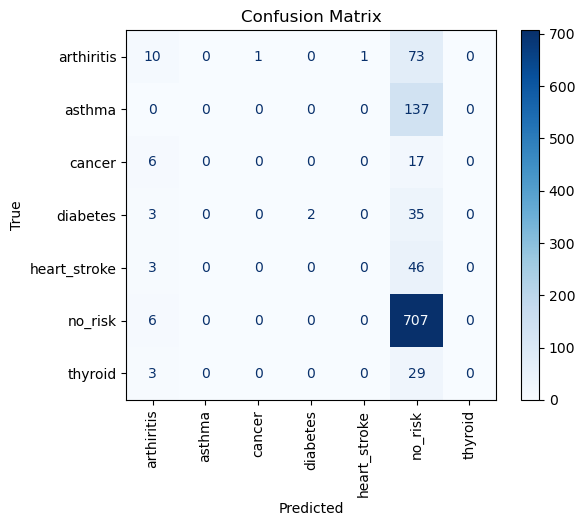

In [162]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [163]:
lgr_model_3_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",lgr_model_3_acc,"%")

Model Accuracy: 66.64 %


## 6.2 Decision Tree

In [164]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}


dt=DecisionTreeClassifier()

grid_search=GridSearchCV(dt,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_result=grid_search.fit(X_train_prep,y_train)

dt_best_param=grid_result.best_params_
print(dt_best_param)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
645 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\navan\anaconda3\Lib\site-pack

In [165]:
#best parameters - {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 
#'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

In [166]:

## Running a DecisionTreeClassifier models with the training data and the best parameters

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='log2',min_samples_leaf=1,min_samples_split=10,splitter='random')
dt_model_3 = dt.fit(X_train_prep,y_train)
y_pred = dt_model_3.predict(X_test_prep)


In [167]:
dt.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

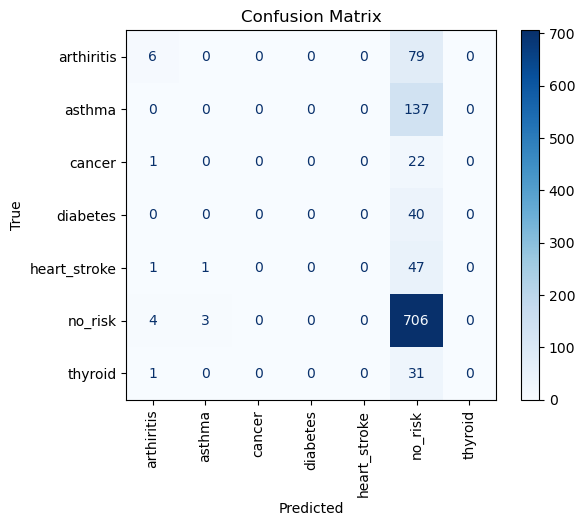

In [168]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [169]:
dt_model_3_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",dt_model_3_acc,"%")

Model Accuracy: 65.99 %


## 6.3 Random Forest

In [187]:
# Approximate run time for the below cell
#CPU times: total: 8.5 s
#Wall time: 20min 41s

In [188]:
%%time

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
}


rf=RandomForestClassifier()

grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_result=grid_search.fit(X_train_prep,y_train)

rf_best_param=grid_result.best_params_
print(rf_best_param)

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
462 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\navan\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\navan\anaconda3\Lib\site-pack

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
CPU times: total: 15.7 s
Wall time: 21min 11s


In [189]:
#{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt',
#'n_estimators': 100}
#CPU times: total: 8.38 s
#Wall time: 21min 38s

In [190]:

## Running a RandomForestClassifier models with the training data and the best parameters

rf = RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators=100,bootstrap=True)
rf_model_3 = rf.fit(X_train_prep,y_train)
y_pred = rf_model_3.predict(X_test_prep)


In [191]:
rf.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

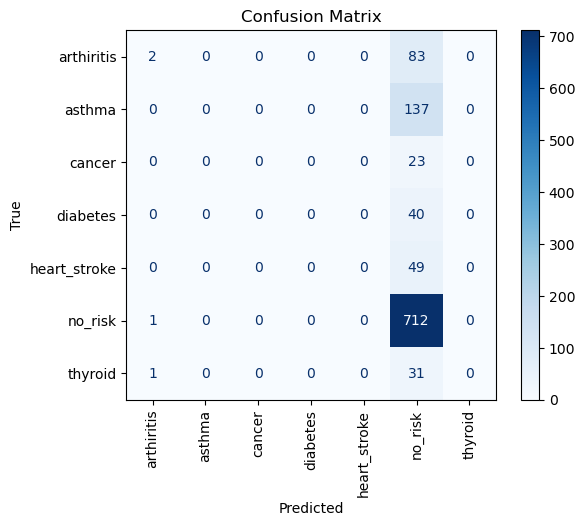

In [192]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [193]:
rf_model_3_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",rf_model_3_acc,"%")

Model Accuracy: 66.17 %


## 6.4 KNeighbors Classifier

In [170]:
%%time

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40]
}



knc=KNeighborsClassifier()

grid_search=GridSearchCV(knc,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_result=grid_search.fit(X_train_prep,y_train)

knc_best_param=grid_result.best_params_
print(knc_best_param)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
CPU times: total: 4.53 s
Wall time: 37.7 s


In [171]:
#{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
#CPU times: total: 2.91 s
#Wall time: 28.3 s

In [172]:

## Running a KNeighborsClassifier models with the training data and the best parameters

knc = KNeighborsClassifier(algorithm='auto',n_neighbors=9,p=2,weights='distance',leaf_size=20)
knc_model_3 = knc.fit(X_train_prep,y_train)
y_pred = knc_model_3.predict(X_test_prep)


In [173]:
knc.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

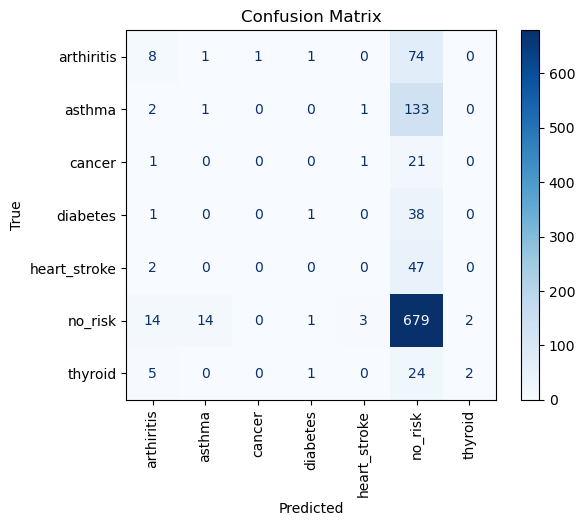

In [174]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [175]:
knc_model_3_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",knc_model_3_acc,"%")

Model Accuracy: 64.04 %


## 6.5 Support Vector Machine

In [196]:
# Approximate run time for the below cell
#CPU times: total: 6.03 s
#Wall time: 11min 17s

In [197]:
%%time

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],
    'decision_function_shape': ['ovo', 'ovr']
}



svc=SVC()

grid_search=GridSearchCV(svc,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_result=grid_search.fit(X_train_prep,y_train)

svc_best_param=grid_result.best_params_
print(svc_best_param)

{'C': 1, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
CPU times: total: 7.16 s
Wall time: 21min 19s


In [198]:
#{'C': 1, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
#CPU times: total: 6.03 s
#Wall time: 11min 17s

In [199]:

## Running a Support Vector Machine models with the training data and the best parameters

svc = SVC(C=1,decision_function_shape='ovo',degree=2,gamma='scale',kernel='rbf')
svc_model_3 = svc.fit(X_train_prep,y_train)
y_pred = svc_model_3.predict(X_test_prep)


In [200]:
svc.classes_

array(['arthiritis', 'asthma', 'cancer', 'diabetes', 'heart_stroke',
       'no_risk', 'thyroid'], dtype=object)

<Figure size 10000x1000 with 0 Axes>

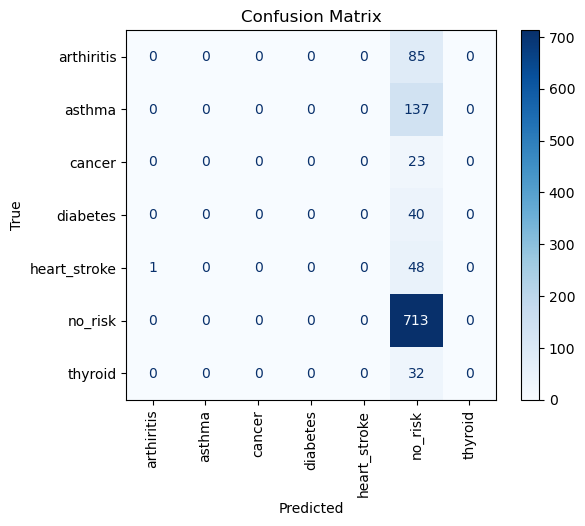

In [201]:
cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(100,10))

# Create a ConfusionMatrixDisplay object
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)



# Customize the appearance of the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add a title
plt.title('Confusion Matrix')

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(rotation=90)

# Show the confusion matrix
plt.show()

In [202]:
svc_model_3_acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Model Accuracy:",svc_model_3_acc,"%")

Model Accuracy: 66.08 %


# 7. Model Evaluation

In [367]:
models=['lgr','dt','rf','knc']

model_data = []
column_names=[]


In [368]:
for i in models:
    for j in [1,2,3]:
        model_name=i+"_"+"model_"+str(j)
        model=globals()[model_name]
        if j==2:
            selected_column_names=globals()[i+"_selected_column_names"]
            eliminated_column_names=globals()[i+"_eliminated_column_names"]
            X_train_prep_filtered=X_train_prep[selected_column_names]
            X_test_prep_filtered=X_test_prep[selected_column_names]
            y_pred=model.predict(X_test_prep_filtered)
            accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
            recall= round(metrics.recall_score(y_test, y_pred,average='weighted')*100,2)
            f1= round(metrics.f1_score(y_test, y_pred,average='weighted')*100,2)
            column_names.append({'model':i,'model_name': model_name, 'type_of_model': j, 'selected_column_names': selected_column_names,'eliminated_column_names':eliminated_column_names})
        else:
            y_pred=model.predict(X_test_prep)
            accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
            recall= round(metrics.recall_score(y_test, y_pred,average='weighted')*100,2)
            f1= round(metrics.f1_score(y_test, y_pred,average='weighted')*100,2)
        model_data.append({'model':i,'model_name': model_name, 'type_of_model': j, 'model_accuracy': accuracy,'model_recall':recall,'model_f1_score':f1})
model_data.append({'model':'nn','model_name': 'Neural Networks', 'type_of_model': 1, 'model_accuracy': nn_model_1_acc})
model_acc = pd.DataFrame(model_data)
model_acc


model       model_name  type_of_model  model_accuracy  model_recall  \
0    lgr      lgr_model_1              1           66.27         66.27   
1    lgr      lgr_model_2              2           65.89         65.89   
2    lgr      lgr_model_3              3           66.64         66.64   
3     dt       dt_model_1              1           51.16         51.16   
4     dt       dt_model_2              2           50.70         50.70   
5     dt       dt_model_3              3           65.99         65.99   
6     rf       rf_model_1              1           66.17         66.17   
7     rf       rf_model_2              2           66.17         66.17   
8     rf       rf_model_3              3           66.17         66.17   
9    knc      knc_model_1              1           60.43         60.43   
10   knc      knc_model_2              2           60.06         60.06   
11   knc      knc_model_3              3           64.04         64.04   
12    nn  Neural Networks              1           65.99           NaN   

    model_f1_score  
0            55.93  
1            52.49  
2            54.89  
3            52.16  
4            51.24  
5            53.53  
6            53.55  
7            54.82  
8            52.98  
9            53.51  
10           54.65  
11           53.63  
12             NaN

In [370]:
column_names_df=pd.DataFrame(column_names)
column_names_df

model   model_name  type_of_model  \
0   lgr  lgr_model_2              2   
1    dt   dt_model_2              2   
2    rf   rf_model_2              2   
3   knc  knc_model_2              2   

                               selected_column_names  \
0  [Gender_M, Race_NHA, Race_NHB, Race_OHP, Race_...   
1  [Gender_M, Race_NHA, Race_NHB, Race_NHW, Race_...   
2  [Gender_M, Race_NHA, Race_NHB, Race_NHW, Race_...   
3  [Race_NHA, Race_NHB, Race_NHW, Race_OHP, Race_...   

                             eliminated_column_names  
0  [Race_NHW, supplements_taken_Yes, Age, Ratio_F...  
1  [Ratio_Famincome_to_Pov, avgday_Energy_in_kcal...  
2  [Ratio_Famincome_to_Pov, avgday_Energy_in_kcal...  
3  [Gender_M, Country_US, Ratio_Famincome_to_Pov,...

In [ ]:
model_acc.to_csv('./Outputs/results.csv')

# Saving models

In [203]:
joblib.dump(lgr_model_1,'./models/lgr_model_1.pkl')
joblib.dump(dt_model_1,'./models/dt_model_1.pkl')
joblib.dump(rf_model_1,'./models/rf_model_1.pkl')
joblib.dump(knc_model_1,'./models/knc_model_1.pkl')
joblib.dump(svc_model_1,'./models/svc_model_1.pkl')
joblib.dump(nn_model_1,'./models/nn_model_1.pkl')

joblib.dump(lgr_model_2,'./models/lgr_model_2.pkl')
joblib.dump(dt_model_2,'./models/dt_model_2.pkl')
joblib.dump(rf_model_2,'./models/rf_model_2.pkl')
joblib.dump(knc_model_2,'./models/knc_model_2.pkl')
joblib.dump(svc_model_2,'./models/svc_model_2.pkl')

joblib.dump(lgr_model_3,'./models/lgr_model_3.pkl')
joblib.dump(dt_model_3,'./models/dt_model_3.pkl')
joblib.dump(rf_model_3,'./models/rf_model_3.pkl')
joblib.dump(knc_model_3,'./models/knc_model_3.pkl')
joblib.dump(svc_model_3,'./models/svc_model_3.pkl')


['./models/svc_model_3.pkl']

# Dashboard

In [360]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1(children=["Chronic Disease Risk Predictor"],style={'font-weight': 'bold', "text-align": "center"}),
html.Div([
        html.Label('Gender:', style={'font-weight': 'bold'}),
        dcc.Dropdown(options=['Male', 'Female'], value="Male", id='gender-dropdown')
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Race:', style={'font-weight': 'bold'}),
        dcc.Dropdown(options=['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other'], value='Other', id='race-dropdown')
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Country:', style={'font-weight': 'bold'}),
        dcc.Dropdown(options=['US', 'Non_US'], value="US", id='country-dropdown')
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Supplements Taken:', style={'font-weight': 'bold'}),
        dcc.Dropdown(options=['Yes', 'No'], value="Yes", id='supplements-dropdown')
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Access To Healthcare:', style={'font-weight': 'bold'}),
        dcc.Dropdown(options=['Yes', 'No'], value="Yes", id='access-dropdown')
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Age:', style={'font-weight': 'bold'}),
        dcc.Input(id="age", type="number")
    ], style={'margin-bottom': '10px'}),

    html.Div([
        html.Label('Ratio of Family Income to Poverty:', style={'font-weight': 'bold'}),
        dcc.Input(id="rftp", type="number")
    ], style={'margin-bottom': '10px'}),
    html.Div([
        html.Label(['Average Energy Intake in Kcal per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="aeik", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Sugar Intake in gm per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="asig", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Dietary Fibres Intake in gm per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="adfig", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin E Intake in mcg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="aveimcg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin A Intake in mcg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avaimcg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin B1 Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avb1img", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin B2 Intake in mcg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avb2img", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin B6 Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avb6img", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin B12 Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avb12img", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average added Vitamin B6 Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="addedvb6img", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin C Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avcimg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin D Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avdimg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Vitamin K Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="avkimg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Calcium Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="acalcimg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Caffeine Intake in mg per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="acaffimg", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Pulse Rate:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="apr", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Body Mass Index:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="bmi", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Cholestrol mgperdL:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="cmgpdL", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['White Blood Cell Count:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="wbcc", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Red Blood Cell Count:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="rbcc", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Hemoglobin gperdL:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="hgpdL", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Alcoholic Drinks per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="aadpd", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Average Cigarettes per day:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="acpd", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Exerise Days per Week:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="edpw", type="number")
    ], style={'margin-bottom': '10px'}),
    
    html.Div([
    html.Label(['Vigorous Work days per Week:'], style={'font-weight': 'bold', "text-align": "center"}),
    dcc.Input(id="vwdpw", type="number")
    ], style={'margin-bottom': '10px'}),
    
     html.Div([
    html.Button('Predict Disease', id='submit-val', n_clicks=0)
    ], style={'margin-bottom': '10px',"align": "center","text-align": "center","color":"blue"}),
    
    
    html.Div([
    html.Label(['The Disease predicted:'], style={'font-weight': 'bold', "text-align": "center"}),
    ], style={'margin-bottom': '30px',"align": "center"}),    
    
    html.Div(id='output',style={'margin-bottom': '30px',"align": "center"}),
    
])


    


@app.callback(
        Output(component_id='output', component_property='children'),
        Input(component_id='gender-dropdown', component_property='value'),
        Input(component_id='race-dropdown', component_property='value'),
        Input(component_id='country-dropdown', component_property='value'),
        Input(component_id='supplements-dropdown', component_property='value'),
        Input(component_id='access-dropdown', component_property='value'),
        Input(component_id='age', component_property='value'),
        Input(component_id='rftp', component_property='value'),
        Input(component_id='aeik', component_property='value'),
        Input(component_id='asig', component_property='value'),
        Input(component_id='adfig', component_property='value'),
        Input(component_id='aveimcg', component_property='value'),
        Input(component_id='avaimcg', component_property='value'),
        Input(component_id='avb1img', component_property='value'),
        Input(component_id='avb2img', component_property='value'),
        Input(component_id='avb6img', component_property='value'),
        Input(component_id='avb12img', component_property='value'),
        Input(component_id='addedvb6img', component_property='value'),
        Input(component_id='avcimg', component_property='value'),
        Input(component_id='avdimg', component_property='value'),
        Input(component_id='avkimg', component_property='value'),
        Input(component_id='acalcimg', component_property='value'),
        Input(component_id='acaffimg', component_property='value'),
        Input(component_id='apr', component_property='value'),
        Input(component_id='bmi', component_property='value'),
        Input(component_id='cmgpdL', component_property='value'),
        Input(component_id='wbcc', component_property='value'),
        Input(component_id='rbcc', component_property='value'),
        Input(component_id='hgpdL', component_property='value'),
        Input(component_id='aadpd', component_property='value'),
        Input(component_id='acpd', component_property='value'),
        Input(component_id='edpw', component_property='value'),
        Input(component_id='vwdpw', component_property='value'),
        Input(component_id='submit-val', component_property='n_clicks'),
        
    
        )

def disease_predict(gender,race,country,supp,access,age,rftp,aeik,asig,adfig,aveimcg,
                    avaimcg,avb1img,avb2img,avb6img,avb12img,addedvb6img,avcimg,avdimg,
                    avkimg,acalcimg,acaffimg,apr,bmi,cmgpdL,wbcc,rbcc,hgpdL,aadpd,acpd,edpw,vwdpw,n_clicks):
    # The additional data is populated such that to binary converted categorical variables that are prodcued
    # from one hot encoding and are part of the building of the model
    new_data={'Gender':['Male','Female','Male','Male','Male','Male',gender], 
            'Race':['Non-Hispanic Asian','Non-Hispanic Black','Non-Hispanic White','Other Hispanic','Other','Mexican American',race],
              'Country':['US','US','Non_US','US','US','US',country], 'supplements_taken':['Yes','No','Yes','Yes','Yes','Yes',supp],
       'access_to_healthcare':['Yes','No','Yes','Yes','Yes','Yes',access], 'Age':[0,0,0,0,0,0,age], 'Ratio_Famincome_to_Pov':[0,0,0,0,0,0,rftp],
       'avgday_Energy_in_kcal':[0,0,0,0,0,0,aeik], 'avgday_sug_in_gm':[0,0,0,0,0,0,asig], 'avgday_diet_fib_in_gm':[0,0,0,0,0,0,adfig],
       'avgday_Vitamin_E_in_mcg':[0,0,0,0,0,0,aveimcg], 'avgday_Vitamin_A_in_mcg':[0,0,0,0,0,0,avaimcg],
       'avgday_Vitamin_B1_in_mg':[0,0,0,0,0,0,avb1img], 'avgday_Vitamin_B2_in_mg':[0,0,0,0,0,0,avb2img], 'Vitamin_B6_mg':[0,0,0,0,0,0,avb6img],
       'Vitamin_B12_mg':[0,0,0,0,0,0,avb12img], 'added_Vitamin_B6_mg':[0,0,0,0,0,0,addedvb6img], 'Vitamin_C_mg':[0,0,0,0,0,0,avcimg],
       'avgday_Vitamin_D_in_mg':[0,0,0,0,0,0,avdimg], 'avgday_Vitamin_K_in_mg':[0,0,0,0,0,0,avkimg],
       'avgday_calcium_in_mg':[0,0,0,0,0,0,acalcimg], 'avgday_caffeine_in_mg':[0,0,0,0,0,0,acaffimg], 'avg_pulse_rate':[0,0,0,0,0,0,apr],
       'body_mass_index':[0,0,0,0,0,0,bmi], 'tot_cholestrol_mgperdL':[0,0,0,0,0,0,cmgpdL], 'white_blood_cell_count':[0,0,0,0,0,0,wbcc],
       'red_blood_cell_count':[0,0,0,0,0,0,rbcc], 'hemoglobin_gperdL':[0,0,0,0,0,0,hgpdL], 'avg_alc_drinks_per_day':[0,0,0,0,0,0,aadpd],
       'avg_cig_per_day':[0,0,0,0,0,0,acpd], 'exercise_days_per_week':[0,0,0,0,0,0,edpw],
       'vigorous_workdays_per_week':[0,0,0,0,0,0,vwdpw]}
    dash_data=pd.DataFrame(new_data)
    #print(dash_data.dtypes)
    race_map={'Mexican American':'MexA','Other Hispanic':'OHP','Non-Hispanic White':'NHW','Non-Hispanic Black':'NHB','Non-Hispanic Asian':'NHA','Other':'others'}
    gender_map={'Male':'M','Female':'F'}
    dash_data['Race']=dash_data['Race'].map(race_map)
    dash_data['Gender']=dash_data['Gender'].map(gender_map)
    dash_data_transformed=preprocessor.fit_transform(dash_data).round(2)
    encoded_column_names = preprocessor.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out()
    transformed_column_names = list(encoded_column_names) + list(dash_data.select_dtypes(include=np.number).columns)
    dash_data_prep=pd.DataFrame(dash_data_transformed,columns=transformed_column_names)
    #print(dash_data_prep.dtypes)
    if n_clicks>0:
        input_df=pd.DataFrame(dash_data_prep.iloc[[5]])
        out=lgr_model_3.predict(input_df)
        return out[0]

if __name__ == '__main__':
    app.run_server(debug=True,jupyter_mode='external',port=8142)

Dash app running on http://127.0.0.1:8142/
Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                           float64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal         float64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_b

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                           float64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal         float64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal         float64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov          int64
avgday_Energy_in_kcal         float64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal         float64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm              float64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm         float64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg       float64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg       float64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg       float64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg       float64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                 float64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                float64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg           float64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                  float64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg        float64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg        float64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg          float64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg         float64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                float64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index               float64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL        float64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count        float64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Gender                         object
Race                           object
Country                        object
supplements_taken              object
access_to_healthcare           object
Age                             int64
Ratio_Famincome_to_Pov        float64
avgday_Energy_in_kcal           int64
avgday_sug_in_gm                int64
avgday_diet_fib_in_gm           int64
avgday_Vitamin_E_in_mcg         int64
avgday_Vitamin_A_in_mcg         int64
avgday_Vitamin_B1_in_mg         int64
avgday_Vitamin_B2_in_mg         int64
Vitamin_B6_mg                   int64
Vitamin_B12_mg                  int64
added_Vitamin_B6_mg             int64
Vitamin_C_mg                    int64
avgday_Vitamin_D_in_mg          int64
avgday_Vitamin_K_in_mg          int64
avgday_calcium_in_mg            int64
avgday_caffeine_in_mg           int64
avg_pulse_rate                  int64
body_mass_index                 int64
tot_cholestrol_mgperdL          int64
white_blood_cell_count          int64
red_blood_ce

C:\Users\navan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

